# SDG 11.3: Mapping Land Use & Population Growth in the Amazon-Cerrado Ecotone Region (Brazil)

## <font color='blue'>Spatial Demographic Analysis</font>

## Overview

This project aims to analyze the relationship between land use consumption rates (LCR) and population growth rates (PGR) in urban areas in the Amazon-Cerrado Ecotone Region in Brazil. To achieve this goal, it was considered in this study the Goal 11. Make cities and human settlements inclusive, safe, resilient and sustainable, Target 11.3: By 2030, enhance inclusive and sustainable urbanization and capacity for participatory, integrated and sustainable human settlement planning and management in all countries. The focus relied in the Indicator 11.3.1: Ratio of land consumption rate to population growth rate, using the methodology proposed by United Nation (UN).

All the information, concepts and methodology here adopted was based on the official documentation provided by United Nation (UN) available at:

https://unstats.un.org/sdgs/metadata/?Text=&Goal=&Target=11.3

## Definition, concepts, and classifications

### Indicator Definition:

The indicator under consideration is the ratio of the land consumption rate to the population growth rate. This requires the clear definition of two key components: population growth and land consumption rate.

### Population Growth:

The population growth rate is a relatively straightforward component. It is typically readily available, and its computation is standard and widely understood.

### Land Consumption Rate:

The land consumption rate, on the other hand, is more complex and challenging to define. The primary challenge lies in defining what exactly constitutes "consumption" of land. The term could refer to land that is "consumed", "preserved", or made available for "development", such as land occupied by wetlands.

Further complexity arises due to the difficulty in determining if the land being developed is genuinely "newly-developed" (or empty) land, or if it is at least partially "redeveloped". Given these considerations, the land consumption rate will be measured as the percentage of the total urban land that was newly developed (or consumed).

### City or Urban Area:

The concept of a "city" or "urban area" underwent extensive discussion and deliberation since 2016. UN-Habitat and its partners conducted global consultations to settle on meaningful definitions that would be beneficial for the global monitoring and reporting process.

Following consultations with 86 member states, the United Nations Statistical Commission endorsed the Degree of Urbanisation (DEGURBA) during its 51st Session in March 2020. This was identified as a viable method for delineating cities, urban, and rural areas, allowing for accurate international statistical comparisons.

Though for the computation of the 11.3.1 indicator, countries are strongly recommended to adopt the DEGURBA method to define their analysis area (city or urban area), the GHSL - Global Human Settlement Layer dataset presents some challenges. The dataset is composed of different epochs, resolutions, and coordinate systems, and not all the necessary combinations for this study are available.

Therefore, in this study, we've considered the Mapbiomas Land Use and Cover dataset as an alternative. Mapbiomas is a Brazilian initiative that provides annual land cover and land use maps across Brazil, allowing for nuanced analysis of urban and rural development over time. Its comprehensive coverage, combined with its high level of detail and accuracy (with spatial resolution of 30 meters), makes it a valuable resource for understanding the evolving dynamics of urbanization and land consumption in a way that aligns more closely with the specific needs of our study.

More about the Mapbiomas Project available here:

https://mapbiomas.org/

### Population Growth Rate (PGR):

The Population Growth Rate (PGR) refers to the change in a population in a defined area (such as a country or a city) during a specific time period, usually one year. The PGR is expressed as a percentage of the population at the beginning of the time period in question. This rate not only reflects the number of births and deaths during the period but also accounts for the number of people migrating to and from the specified area. In the context of the Sustainable Development Goal (SDG) indicator 11.3.1, PGR is calculated for the area defined as a city or urban area.

### Land Consumption:

Within the scope of indicator 11.3.1, land consumption is characterized as the uptake of land for urbanized uses. This often involves the transformation of land from non-urban to urban functions.

### Land Consumption Rate:

The Land Consumption Rate measures the rate at which urbanized land or land occupied by a city/urban area changes during a period, typically over one year. It is expressed as a percentage of the land occupied by the city or urban area at the beginning of that period. This provides a metric for evaluating the pace at which urban development and land use changes occur.

## Methodology

The methodology adopted for this study is as follows:

- <font color='red'>**Data Collection**</font>: Demographic data was collected from Census (Brazilian Institute of Geography and Statistics - IBGE), and spatial data was obtained through Google Earth Engine API using Mapbiomas Collection dataset.

- <font color='red'>**Data Preprocessing**</font>: The collected data was preprocessed and cleaned to remove any inconsistencies and errors.

- **Calculation of LCR**: The land use consumption rate was calculated using the formula:

$$ LCR = \frac{\text{(Urban Area (Present) - Urban Area (Past))}}{\text{Urban Area (Past)}}*\frac{\text{1}}{\text{T}} $$

- **Calculation of PGR**: The population growth rate was calculated using the formula:

In the UN methodology proposal PGR is calculated as log, while LCR is not. Generally, the logarithmic method is used for calculating compound growth rates over multiple periods because it correctly accounts for the compounding effect. On the other hand, the linear method for calculating the land consumption rate (LCR) is calculating the rate of change over time. To use consistent methods when directly comparing or combining different metrics such as LCR and PGR, here it was adopted the linear method for both to ensure proper comparison between them.

$$ PGR = \frac{\text{(Population (Present))}}{\text{(Population (Past))}}*\frac{\text{1}}{\text{T}}  $$

- **Land Consumption Rate to Population Growth Rate (LCRPGR)**: 

$$ LCRPGR = \frac{\text{Land Consumption Rate}}{\text{Population Growth Rate}} $$

Interpretation:

'>1 decreasing population density (change in urban area > change population)

< 1 increasing population density (change in urban area < change population)


- **Spatial Analysis**: The LCR and PGR values were analyzed spatially using Geographic Information System (GIS) tools and techniques.

In [1]:
# Libraries
import ee
import geemap
import sidrapy
import pandas as pd
import geopandas as gpd
from IPython.display import display
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import mplleaflet
from matplotlib_scalebar.scalebar import ScaleBar
import seaborn as sns
import folium
import numpy as np
import pandas as pd
import plotly.io as pio

## Urban Data

### Mapbiomas Collection

MapBiomas is a multi-institutional initiative that involves universities, technology companies, and non-governmental organizations to collaboratively produce annual, high-resolution land use and land cover (LULC) maps of the entire Brazilian territory.

#### Methodology:
MapBiomas utilizes a combination of satellite image processing and a machine learning approach to create its land use and cover maps. It collects satellite imagery, primarily from Landsat and Sentinel satellites, and then uses a decision-tree based algorithm for automatic classification of different land cover types.

The algorithm uses training data sets derived from known land cover types and classifications to "learn" and then "predict" the land cover types for the whole territory based on the satellite image data. This method allows MapBiomas to handle the extensive variation in Brazil's diverse landscapes, spanning from the Amazon rainforest to the agricultural regions of the country's center-west.

#### Spatial Resolution:
MapBiomas provides data at a relatively high spatial resolution of 30 meters. This level of detail allows for more accurate representations and analyses of the land cover and land use across Brazil, from large-scale deforestation events to smallholder farming practices.

#### Accuracy:
MapBiomas' accuracy is maintained through rigorous validation processes. Each annual map produced by MapBiomas is subjected to an accuracy assessment using an independent set of reference data. This reference data is collected from very high-resolution imagery or field surveys that can accurately determine the true land cover type.

Despite the challenges of classifying such a large and diverse area, MapBiomas has demonstrated high overall accuracy levels, making it a valuable resource for environmental monitoring, urban planning, and policy-making. However, as with any remote sensing-based product, users should be aware of potential uncertainties and consider accuracy assessments for specific regions and land cover types.

In [2]:
# Google Earth Engine (GEE) Authentification 
ee.Authenticate()

Enter verification code:  4/1AZEOvhXQNocRYelkkcp1dzdSPTPM0J9tZePf1dQizdTbYFlbUWWUNABBYVo



Successfully saved authorization token.


In [3]:
# Google Earth Engine (GEE) initialization
ee.Initialize()

In [4]:
# Defining an image collection - accessing the data asset in Google Earth Engine: ID: projects/mapbiomas-workspace/public/collection7/mapbiomas_collection70_integration_v2
path_project = 'projects/mapbiomas-workspace/public/collection7/mapbiomas_collection70_integration_v2'

mapbiomas = ee.Image(path_project)
print('Dados MapBiomas',mapbiomas.bandNames().getInfo())

Dados MapBiomas ['classification_1985', 'classification_1986', 'classification_1987', 'classification_1988', 'classification_1989', 'classification_1990', 'classification_1991', 'classification_1992', 'classification_1993', 'classification_1994', 'classification_1995', 'classification_1996', 'classification_1997', 'classification_1998', 'classification_1999', 'classification_2000', 'classification_2001', 'classification_2002', 'classification_2003', 'classification_2004', 'classification_2005', 'classification_2006', 'classification_2007', 'classification_2008', 'classification_2009', 'classification_2010', 'classification_2011', 'classification_2012', 'classification_2013', 'classification_2014', 'classification_2015', 'classification_2016', 'classification_2017', 'classification_2018', 'classification_2019', 'classification_2020', 'classification_2021']


In [5]:
# Palette MapBiomas - https://mapbiomas-br-site.s3.amazonaws.com/downloads/_EN__C%C3%B3digos_da_legenda_Cole%C3%A7%C3%A3o_7.pdf
palette_list = ['#ffffff','#129912','#1f4423','#006400','#00ff00','#687537','#76a5af','#29eee4',
'#77a605','#ad4413','#bbfcac','#45c2a5','#b8af4f','#f1c232','#ffffb2','#ffd966',
'#f6b26b','#f99f40','#e974ed','#d5a6bd','#c27ba0','#fff3bf','#ea9999','#dd7e6b',
'#aa0000','#ff8585','#0000ff','#d5d5e5','#dd497f','#665a3a','#ff0000','#1f0478',
'#968c46','#0000ff','#4fd3ff','#ba6a27','#f3b4f1','#02106f','#02106f','#e075ad',
'#982c9e','#e787f8','#ebebe0','#c2c2a3','#6b6b47','#d0ffd0','#cca0d4','#d082de',
'#cd49e4','#6b9932','#66ffcc','#000000','#000000','#000000','#000000','#000000',
'#000000','#CC66FF','#FF6666','#006400','#8d9e8b','#84ff75','#faf87d']

In [6]:
# Visualizing MapBiomas data
Map = geemap.Map(location=[-14.235, -51.9253], zoom=4)

# Mapbiomas layer
map_1985 = mapbiomas.select('classification_1985')
map_2021 = mapbiomas.select('classification_2021')

# Show
Map.addLayer(map_1985, {'palette':palette_list, 'min':0, 'max':62},'1985')
Map.addLayer(map_2021, {'palette':palette_list, 'min':0, 'max':62},'2021')

# Visualizing
Map

Map(center=[-14.235, -51.9253], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(ch…

## Creating LUC Image collection

In [7]:
# Defining region of interest (ROI)
region = ee.FeatureCollection('projects/ee-berbert/assets/SIDRA_MUN_SDG')

In [8]:
# Exporting region of interest shapefile to Drive
# Define export configuration
task_config = {
    'folder': 'SDG11', # specify your folder name here
    'fileFormat': 'SHP',  # Supported formats: CSV, SHP, GeoJSON, KML, KMZ
    'fileNamePrefix': 'municipalities_LCRPGR'
}

# Initialize the export task
task = ee.batch.Export.table.toDrive(region, 'Export to drive', **task_config)

# Start the task
task.start()

In [9]:
# Checking existing bands 
bands = mapbiomas.bandNames()

# Creating a list with the bands
mylist =ee.List(bands).slice(6,37,1)
mapbiomas = mapbiomas.select(mylist)

# Loop to create an image collection from the Mapbiomes bands
lista = ee.List.sequence(0,30,1)
years = ee.List.sequence(1991,2021,1)

# Function 
def collection_image(number):
  matchKey = ee.String(ee.List(mapbiomas.bandNames()).get(number)) ##vamos selecionar o valor da lista das bandas
  
  image = ee.Image(mapbiomas).select(matchKey)
  return image.set('year', years.get(number))\
               .set('system:time_start', ee.Date.fromYMD(years.get(number), 1, 1))\
                .clip(region)

# Applying function in a list
listImages = lista.map(collection_image)

# Creating image collection
imageCollection = ee.ImageCollection.fromImages(listImages)
print('Coleção de imagens',imageCollection.size().getInfo())

Coleção de imagens 31


In [10]:
# Image List
img_list = [mapbiomas.select('classification_1991').rename('label').clip(region),
            mapbiomas.select('classification_2001').rename('label').clip(region),
            mapbiomas.select('classification_2011').rename('label').clip(region),
            mapbiomas.select('classification_2021').rename('label').clip(region)]
img_list

In [11]:
# Visualizing Mapbiomas data
Map = geemap.Map(location=[-12.646, -56.096], zoom=6)

Map.addLayer(mapbiomas.select('classification_1991').clip(region),{'palette':palette_list, 'min':0,'max':62},'ROI 1991')
Map.addLayer(mapbiomas.select('classification_2021').clip(region),{'palette':palette_list, 'min':0,'max':62},'ROI 2021')

# Show
Map

Map(center=[-12.646, -56.096], controls=(WidgetControl(options=['position', 'transparent_bg'], widget=HBox(chi…

In [12]:
# Information: How many images
count = imageCollection.size().getInfo()
year_list = years.getInfo()
lista_list= lista.getInfo()

In [13]:
# Dictionary of class names
dicionario_classes = {
    0: "Fora da área de interesse", 
    1: "Floresta", 
    3: "Formação Florestal",
    4: "Formação Savânica", 
    5: "Mangue", 
    49: "Restinga Arborizada",
    10: "Formação Natural não Florestal",
    11: "Campo Alagado e Área Pantanosa",
    12: "Formação Campestre",
    32: "Apicum",
    29: "Afloramento Rochoso",
    50: "Restinga Herbácea",
    13: "Outras Formações não Florestais",
    14: "Agropecuária",
    15: "Pastagem",
    18: "Agricultura",
    19: "Lavoura Temporária",
    39: "Soja",
    20: "Cana",
    40: "Arroz (beta)",
    62: "Algodão (beta)",
    41: "Outras Lavouras Temporárias",
    36: "Lavoura Perene",
    46: "Café",
    47: "Citrus",
    48: "Outras Lavouras Perenes",
    9: "Silvicultura",
    21: "Mosaico de Usos",
    22: "Área não Vegetada",
    23: "Praia, Duna e Areal",
    24: "Área Urbanizada",
    30: "Mineração",
    25: "Outras Áreas não Vegetadas",
    26: "Corpo D'água",
    33: "Rio, Lago e Oceano",
    31: "Aquicultura",
    27: "Não observado"
}

# Dictionary of colors
dicionario_cores = {
    0: "white", 
    1: "#129912",
    3: "#006400", 
    4: "#00ff00",
    5: "#687537", 
    49: "#6b9932",
    10: "#bbfcac", 
    11: "#45c2a5",
    12: "#b8af4f", 
    32: "#968c46",
    29: "#ff8C00", 
    50: "#66ffcc",
    13: "#bdb76b",
    14: "#ffffb2",
    15: "#ffd966",
    18: "#e974ed",
    19: "#d5a6bd",
    39: "#c59ff4",
    20: "#c27ba0",
    40: "#982c9e",
    62: "#660066",
    41: "#e787f8",
    36: "#f3b4f1",
    46: "#cca0d4",
    47: "#d082de",
    48: "#cd49e4",
    9: "#935132",
    21: "#fff3bf",
    22: "#ea9999",
    23: "#dd7e6b",
    24: "#af2a2a",
    30: "#8a2be2",
    25: "#ff99ff",
    26: "#0000ff",
    33: "#0000ff",
    31: "#29eee4",
    27: "#D5D5E5"
}

# Palette of colors:
paleta_nomes = {key:value for key, value in zip(dicionario_classes.values(), dicionario_cores.values())}

In [14]:
# Define the years of interest
years_of_interest = [1991, 2001, 2011, 2021]

# Initialize an empty DataFrame to hold all data
master_df = pd.DataFrame()

# Loop through the years of interest
for year in years_of_interest:
    # Calculate the index in the list corresponding to the current year
    index = year - 1991  # subtract the start year

    # Get the image corresponding to the current year
    image = ee.Image(listImages.get(index))

    # Calculate the areas for this year
    areaImage = ee.Image.pixelArea().divide(1e6).addBands(image)

    areas = areaImage.reduceRegions(
        reducer=ee.Reducer.sum().group(
            groupField=1,
            groupName='classification'
        ),
        collection=region,
        scale=30,
        tileScale=4
    )

    # Convert the areas to a pandas DataFrame
    area_df = geemap.ee_to_pandas(areas)

    # Add a column for the year
    area_df['year'] = year

    # Append the DataFrame for this year to the master DataFrame
    master_df = master_df.append(area_df, ignore_index=True)

In [15]:
# Create an empty DataFrame for the results
all_data = pd.DataFrame()

# Iterate over the rows in your DataFrame
for index, row in master_df.iterrows():
    # Normalize the 'groups' column into a DataFrame
    flattened = pd.json_normalize(row['groups'])

    # Add municipality name, code and year columns to the flattened DataFrame
    flattened['NM_MUNIC_1'] = row['NM_MUNIC_1']
    flattened['CD_GEOCO_1'] = row['CD_GEOCO_1']
    flattened['year'] = row['year']  # add the year

    # Append the flattened DataFrame to the results DataFrame
    all_data = pd.concat([all_data, flattened])

# Reset the index of the resulting DataFrame
all_data.reset_index(drop=True, inplace=True)

# Print the DataFrame
#display(all_data)

In [16]:
# Create a new column 'class_name' by mapping the 'classification' column to the dictionary
all_data['class_name'] = all_data['classification'].map(dicionario_classes)
# Print the DataFrame
all_data

,classification,sum,NM_MUNIC_1,CD_GEOCO_1,year,class_name
0,0,0.152393,VILA BELA DA SANTڿSSIMA TRINDADE,5105507,1991,Fora da área de interesse
1,3,5801.707321,VILA BELA DA SANTڿSSIMA TRINDADE,5105507,1991,Formação Florestal
2,4,3908.692964,VILA BELA DA SANTڿSSIMA TRINDADE,5105507,1991,Formação Savânica
3,11,292.090414,VILA BELA DA SANTڿSSIMA TRINDADE,5105507,1991,Campo Alagado e Área Pantanosa
4,12,783.644185,VILA BELA DA SANTڿSSIMA TRINDADE,5105507,1991,Formação Campestre
...,...,...,...,...,...,...
2451,21,1.318603,RIO BRANCO,5107206,2021,Mosaico de Usos
2452,24,1.604940,RIO BRANCO,5107206,2021,Área Urbanizada
2453,33,0.189100,RIO BRANCO,5107206,2021,"Rio, Lago e Oceano"
2454,39,1.335648,RIO BRANCO,5107206,2021,Soja


In [17]:
# Filter the dataframe for urban areas
urban_areas = all_data[all_data['classification'] == 24]

# Save the DataFrame to a csv file
urban_areas.to_csv('data/urban_areas.csv', index=False)

# Print the new dataframe
#display(urban_areas)

In [18]:
# # Filter the dataframe
# specific_municipality_urban_areas = all_data[(all_data['classification'] == 24) & (all_data['CD_GEOCO_1'] == '5105507')]

# # Print the new dataframe
# display(specific_municipality_urban_areas) #km2

In [19]:
# Convert the Earth Engine object to a GeoPandas GeoDataFrame
region_gdf = geemap.ee_to_geopandas(region)

# Merge the GeoDataFrames
# Saving the urban calculation data in the geometry/shapefile
merged_gdf = region_gdf.merge(urban_areas, on='CD_GEOCO_1', suffixes=('_region', '_urban'))

# Print the merged GeoDataFrame
#display(merged_gdf)

In [20]:
# Organizing urban areas per year
urban_areas_df = urban_areas.pivot(index='CD_GEOCO_1', columns='year', values='sum')
urban_areas_df.reset_index(level=0, inplace=True)
#print(urban_areas_df)

### Calculating Land Consumption Rate (LCR)

In [21]:
#Explaining (example LCR_2001):
#Calculate the difference in urban land area between the years 2001 and 1991
#Dividing this difference by the urban land area in 1991 to find the relative change in urban land area
#To annualize the growth rate, divide the relative change in urban land area by the number of years (T)

# Calculate the LCR_2001 column
T = 2001 - 1991
urban_areas_df['LCR_2001'] = (urban_areas_df[2001] - urban_areas_df[1991]) / urban_areas_df[1991] * 1/T

# Calculate the LCR_2011 column
T = 2011- 2001
urban_areas_df['LCR_2011'] = (urban_areas_df[2011] - urban_areas_df[2001]) / urban_areas_df[2001] * 1/T

# Calculate the LCR_2021 column
T = 2021- 2011
urban_areas_df['LCR_2021'] = (urban_areas_df[2021] - urban_areas_df[2011]) / urban_areas_df[2011] * 1/T

display(urban_areas_df)

year,CD_GEOCO_1,1991,2001,2011,2021,LCR_2001,LCR_2011,LCR_2021
0,5100201,8.501135,10.965164,11.408675,12.589851,0.028985,0.004045,0.010353
1,5100508,2.121248,2.155895,2.240779,2.304876,0.001633,0.003937,0.002860
2,5101258,2.293992,3.225703,3.772492,4.697107,0.040615,0.016951,0.024509
3,5101308,3.566482,4.055886,4.144123,4.469520,0.013722,0.002176,0.007852
4,5101902,2.783709,3.649527,4.175142,5.020841,0.031103,0.014402,0.020256
5,5102504,26.470242,30.335609,33.572283,35.268871,0.014603,0.010670,0.005054
6,5102637,13.404940,14.494414,15.977731,20.161354,0.008127,0.010234,0.026184
7,5102702,4.128524,5.911409,7.172513,9.897337,0.043185,0.021333,0.037990
8,5102850,2.015792,2.351897,2.378224,2.515124,0.016674,0.001119,0.005756
9,5103007,1.812126,4.347918,6.645558,8.484398,0.139935,0.052845,0.027670


## Obtaining, cleaning and organizing Population Data

The population data was obtained from the Brazilian Institute of Geography and Statistics (IBGE) via the Automatic Recovery System (Sistema IBGE de Recuperação Automática) - SIDRA.

The SIDRA database is a comprehensive source of socioeconomic and demographic data about Brazil. It contains extensive information about various aspects of the Brazilian population, geography, economy, and social issues. SIDRA is maintained by the IBGE, which is a governmental agency responsible for statistical, geographic, cartographic, geodetic, and environmental information in Brazil.

SIDRA includes not only census data but also information from various surveys conducted by IBGE. It offers detailed tables, charts, maps, and analytical reports that can be customized according to user's requirements.

In the context of our study, we utilized SIDRA to gather population data across different cities in Brazil for the years 1991, 2000, and 2010. This data was then used to analyze and compare the population growth rates over these periods.

The dataset used to carry this study was the Table 200 - Resident population, by sex, situation and age groups - Sample - General Characteristics of the Population / Tabela 200 - População residente, por sexo, situação e grupos de idade - Amostra - Características Gerais da População (Available at: https://sidra.ibge.gov.br/tabela/200). Here, the urban population was selected for the municipalities in the respective years under analysis.

The Python API Sidrapy was used to automatically obtain the demographic data.

In [22]:
# Obtaining the official code for each municipality and use it to join official demographic data
# Define a function to extract the 'CD_GEOCO_1' property.
def extract_property(feature):
    return ee.Feature(None, {'property_value': feature.get('CD_GEOCO_1')})

# Map the function over the FeatureCollection.
property_collection = region.map(extract_property)

# Convert to Python list.
property_list = property_collection.aggregate_array('property_value').getInfo()

print(property_list)

['5105507', '5106000', '5108600', '5102504', '5105101', '5108402', '5100201', '5100508', '5101258', '5101308', '5101902', '5102637', '5102702', '5102850', '5103007', '5103106', '5103304', '5103403', '5103452', '5103502', '5103809', '5105002', '5105150', '5105259', '5105622', '5105903', '5106109', '5106224', '5106232', '5106307', '5106505', '5106752', '5106778', '5106802', '5106828', '5107107', '5107156', '5107180', '5107305', '5107701', '5107750', '5107776', '5107859', '5107909', '5107925', '5107958', '5108006', '5108501', '5104500', '5107206']


In [23]:
# Select population data for municipalities in the years 1991, 2000, 2010
# SIDRA - see https://servicodados.ibge.gov.br/api/docs/agregados?versao=3#api-bq
# We want to reach this result - https://sidra.ibge.gov.br/tabela/200
# Access SIDRA https://sidra.ibge.gov.br/home/ipca15/brasil
# How to set parameters for extracting and formatting data from a Sidra table: https://apisidra.ibge.gov.br/

dfs = []  # Initialize an empty list to store dataframes

for code in property_list:
    df = sidrapy.get_table(table_code='200',
                           territorial_level='6',
                           ibge_territorial_code=code,
                           classifications= {"1": "1", "2":"0"}, # urban parameters
                           period= 'last 20')
    dfs.append(df)  # Append the dataframe to the list

# Combine all dataframes into one
final_df = pd.concat(dfs)
final_df.head()

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N,D5C,D5N,D6C,D6N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Município (Código),Município,Ano (Código),Ano,Situação do domicílio (Código),Situação do domicílio,Sexo (Código),Sexo,Variável (Código),Variável,Grupo de idade (Código),Grupo de idade
1,6,Município,45,Pessoas,792,5105507,Vila Bela da Santíssima Trindade (MT),1970,1970,1,Urbana,0,Total,93,População residente,0,Total
2,6,Município,45,Pessoas,1704,5105507,Vila Bela da Santíssima Trindade (MT),1980,1980,1,Urbana,0,Total,93,População residente,0,Total
3,6,Município,45,Pessoas,4116,5105507,Vila Bela da Santíssima Trindade (MT),1991,1991,1,Urbana,0,Total,93,População residente,0,Total
4,6,Município,45,Pessoas,2787,5105507,Vila Bela da Santíssima Trindade (MT),2000,2000,1,Urbana,0,Total,93,População residente,0,Total


In [24]:
# Checking the years with data selected
print(final_df['D2N'].unique())

['Ano' '1970' '1980' '1991' '2000' '2010']


In [25]:
# Selecting years: 1991, 2000 and 2010
selected_years_df = final_df[final_df['D2N'].isin(['1991', '2000', '2010'])]
selected_years_df

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N,D5C,D5N,D6C,D6N
3,6,Município,45,Pessoas,4116,5105507,Vila Bela da Santíssima Trindade (MT),1991,1991,1,Urbana,0,Total,93,População residente,0,Total
4,6,Município,45,Pessoas,2787,5105507,Vila Bela da Santíssima Trindade (MT),2000,2000,1,Urbana,0,Total,93,População residente,0,Total
5,6,Município,45,Pessoas,5166,5105507,Vila Bela da Santíssima Trindade (MT),2010,2010,1,Urbana,0,Total,93,População residente,0,Total
3,6,Município,45,Pessoas,9178,5106000,Nortelândia (MT),1991,1991,1,Urbana,0,Total,93,População residente,0,Total
4,6,Município,45,Pessoas,6555,5106000,Nortelândia (MT),2000,2000,1,Urbana,0,Total,93,População residente,0,Total
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,6,Município,45,Pessoas,1259,5104500,Indiavaí (MT),2000,2000,1,Urbana,0,Total,93,População residente,0,Total
5,6,Município,45,Pessoas,1781,5104500,Indiavaí (MT),2010,2010,1,Urbana,0,Total,93,População residente,0,Total
3,6,Município,45,Pessoas,5167,5107206,Rio Branco (MT),1991,1991,1,Urbana,0,Total,93,População residente,0,Total
4,6,Município,45,Pessoas,3477,5107206,Rio Branco (MT),2000,2000,1,Urbana,0,Total,93,População residente,0,Total


In [26]:
# Renaming Columns:
selected_years_df = selected_years_df.rename(columns={
    "NC": "Territorial Level (Code)",
    "NN": "Territorial Level",
    "MC": "Unit of Measure (Code)",
    "MN": "Unit of Measure",
    "V": "Value",
    "D1C": "City (Code)",
    "D1N": "City",
    "D2C": "Year (Code)",
    "D2N": "Year",
    "D3C": "Domicile Situation (Code)",
    "D3N": "Domicile Situation",
    "D4C": "Variable (Code)",
    "D4N": "Variable",
    "D5C": "Sex (Code)",
    "D5N": "Sex",
    "D6C": "Age Group (Code)",
    "D6N": "Age Group"
})

In [27]:
# Droping columns:
columns_to_drop = ["Year (Code)", "Sex (Code)", "Sex", "Age Group (Code)", "Age Group"]
selected_years_df = selected_years_df.drop(columns=columns_to_drop)

In [28]:
# Visualizing data:
selected_years_df

,Territorial Level (Code),Territorial Level,Unit of Measure (Code),Unit of Measure,Value,City (Code),City,Year,Domicile Situation (Code),Domicile Situation,Variable (Code),Variable
3,6,Município,45,Pessoas,4116,5105507,Vila Bela da Santíssima Trindade (MT),1991,1,Urbana,0,Total
4,6,Município,45,Pessoas,2787,5105507,Vila Bela da Santíssima Trindade (MT),2000,1,Urbana,0,Total
5,6,Município,45,Pessoas,5166,5105507,Vila Bela da Santíssima Trindade (MT),2010,1,Urbana,0,Total
3,6,Município,45,Pessoas,9178,5106000,Nortelândia (MT),1991,1,Urbana,0,Total
4,6,Município,45,Pessoas,6555,5106000,Nortelândia (MT),2000,1,Urbana,0,Total
...,...,...,...,...,...,...,...,...,...,...,...,...
4,6,Município,45,Pessoas,1259,5104500,Indiavaí (MT),2000,1,Urbana,0,Total
5,6,Município,45,Pessoas,1781,5104500,Indiavaí (MT),2010,1,Urbana,0,Total
3,6,Município,45,Pessoas,5167,5107206,Rio Branco (MT),1991,1,Urbana,0,Total
4,6,Município,45,Pessoas,3477,5107206,Rio Branco (MT),2000,1,Urbana,0,Total


In [29]:
# Calculating Linear Population Growth Rates for each municipality
# Linear Population Growth Rates for projecting 2001 and 2021 (using 1991-2000 rate, and 2000-2010 rates, respectvely)
# The justification for Linear Methods adopted here are brifly discussed in the Population Data Analysis topic.

# Formula Linear Population Growth Rate per decade:
def calculate_growth_rates(group):
    # Calculate the growth rate for 1991-2000
    group['population_growth_rate_1991_2000'] = (group['Value'].loc[group['Year'] == 2000].values[0] - group['Value'].loc[group['Year'] == 1991].values[0]) / (2000 - 1991)
    # Calculate the growth rate for 2000-2010
    group['population_growth_rate_2000_2010'] = (group['Value'].loc[group['Year'] == 2010].values[0] - group['Value'].loc[group['Year'] == 2000].values[0]) / (2010 - 2000)
    return group

# Convert 'Value' column to numeric
selected_years_df['Value'] = pd.to_numeric(selected_years_df['Value'])

In [30]:
# Convert 'Value' column to numeric
selected_years_df["Year"] = selected_years_df["Year"].astype(int)
selected_years_df["Value"] = pd.to_numeric(selected_years_df["Value"])

In [31]:
# Then, applying the function
selected_years_df = selected_years_df.groupby('City').apply(calculate_growth_rates)
display(selected_years_df)

,Territorial Level (Code),Territorial Level,Unit of Measure (Code),Unit of Measure,Value,City (Code),City,Year,Domicile Situation (Code),Domicile Situation,Variable (Code),Variable,population_growth_rate_1991_2000,population_growth_rate_2000_2010
3,6,Município,45,Pessoas,9846,5100508,Alto Paraguai (MT),1991,1,Urbana,0,Total,-369.333333,-13.9
4,6,Município,45,Pessoas,6522,5100508,Alto Paraguai (MT),2000,1,Urbana,0,Total,-369.333333,-13.9
5,6,Município,45,Pessoas,6383,5100508,Alto Paraguai (MT),2010,1,Urbana,0,Total,-369.333333,-13.9
3,6,Município,45,Pessoas,7276,5101258,Araputanga (MT),1991,1,Urbana,0,Total,392.666667,137.5
4,6,Município,45,Pessoas,10810,5101258,Araputanga (MT),2000,1,Urbana,0,Total,392.666667,137.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4,6,Município,45,Pessoas,211303,5108402,Várzea Grande (MT),2000,1,Urbana,0,Total,6221.777778,3740.1
5,6,Município,45,Pessoas,248704,5108402,Várzea Grande (MT),2010,1,Urbana,0,Total,6221.777778,3740.1
3,6,Município,45,Pessoas,7513,5100201,Água Boa (MT),1991,1,Urbana,0,Total,475.777778,496.4
4,6,Município,45,Pessoas,11795,5100201,Água Boa (MT),2000,1,Urbana,0,Total,475.777778,496.4


In [32]:
# Checking population increase or decrease:
def check_population_increase(group):
    if group[group['Year'] == 1991]['Value'].values[0] < group[group['Year'] == 2010]['Value'].values[0]:
        return 'increased'
    else:
        return 'decreased'

population_trend = selected_years_df.groupby('City').apply(check_population_increase).reset_index()
population_trend.columns = ['City', 'population_trend']

if 'population_trend' in selected_years_df.columns:
    selected_years_df = selected_years_df.drop(columns='population_trend')

# Then perform the merge operation as before
selected_years_df = pd.merge(selected_years_df, population_trend, on='City')

# Verify the changes
display(selected_years_df)

,Territorial Level (Code),Territorial Level,Unit of Measure (Code),Unit of Measure,Value,City (Code),City,Year,Domicile Situation (Code),Domicile Situation,Variable (Code),Variable,population_growth_rate_1991_2000,population_growth_rate_2000_2010,population_trend
0,6,Município,45,Pessoas,9846,5100508,Alto Paraguai (MT),1991,1,Urbana,0,Total,-369.333333,-13.9,decreased
1,6,Município,45,Pessoas,6522,5100508,Alto Paraguai (MT),2000,1,Urbana,0,Total,-369.333333,-13.9,decreased
2,6,Município,45,Pessoas,6383,5100508,Alto Paraguai (MT),2010,1,Urbana,0,Total,-369.333333,-13.9,decreased
3,6,Município,45,Pessoas,7276,5101258,Araputanga (MT),1991,1,Urbana,0,Total,392.666667,137.5,increased
4,6,Município,45,Pessoas,10810,5101258,Araputanga (MT),2000,1,Urbana,0,Total,392.666667,137.5,increased
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,6,Município,45,Pessoas,211303,5108402,Várzea Grande (MT),2000,1,Urbana,0,Total,6221.777778,3740.1,increased
146,6,Município,45,Pessoas,248704,5108402,Várzea Grande (MT),2010,1,Urbana,0,Total,6221.777778,3740.1,increased
147,6,Município,45,Pessoas,7513,5100201,Água Boa (MT),1991,1,Urbana,0,Total,475.777778,496.4,increased
148,6,Município,45,Pessoas,11795,5100201,Água Boa (MT),2000,1,Urbana,0,Total,475.777778,496.4,increased


In [33]:
# Group by 'City' and then take the first 'population_trend' for each group
unique_city_trends = selected_years_df.groupby('City')['population_trend'].first()

# Now use value_counts on this to get the counts for each trend
counts = unique_city_trends.value_counts()
print(counts)

increased    42
decreased     8
Name: population_trend, dtype: int64


In [34]:
# Projecting population using years counting and growth rate calculated previosly:

def calculate_new_population(group):
    group['new_population_count_2001'] = group['Value'].loc[group['Year'] == 2000].values[0] + group['population_growth_rate_1991_2000'] * (2001 - 2000)
    group['new_population_count_2011'] = group['Value'].loc[group['Year'] == 2000].values[0] + group['population_growth_rate_2000_2010'] * (2011 - 2000)
    group['new_population_count_2021'] = group['new_population_count_2011'] + group['population_growth_rate_2000_2010'] * (2021 - 2011)
    return group

# Applying function:
selected_years_df = selected_years_df.groupby('City').apply(calculate_new_population)

In [35]:
# Export table as csv and visualize it:
selected_years_df.to_csv('data/selected_years_df.csv', index=False)

# Visualizing
selected_years_df

,Territorial Level (Code),Territorial Level,Unit of Measure (Code),Unit of Measure,Value,City (Code),City,Year,Domicile Situation (Code),Domicile Situation,Variable (Code),Variable,population_growth_rate_1991_2000,population_growth_rate_2000_2010,population_trend,new_population_count_2001,new_population_count_2011,new_population_count_2021
0,6,Município,45,Pessoas,9846,5100508,Alto Paraguai (MT),1991,1,Urbana,0,Total,-369.333333,-13.9,decreased,6152.666667,6369.1,6230.1
1,6,Município,45,Pessoas,6522,5100508,Alto Paraguai (MT),2000,1,Urbana,0,Total,-369.333333,-13.9,decreased,6152.666667,6369.1,6230.1
2,6,Município,45,Pessoas,6383,5100508,Alto Paraguai (MT),2010,1,Urbana,0,Total,-369.333333,-13.9,decreased,6152.666667,6369.1,6230.1
3,6,Município,45,Pessoas,7276,5101258,Araputanga (MT),1991,1,Urbana,0,Total,392.666667,137.5,increased,11202.666667,12322.5,13697.5
4,6,Município,45,Pessoas,10810,5101258,Araputanga (MT),2000,1,Urbana,0,Total,392.666667,137.5,increased,11202.666667,12322.5,13697.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,6,Município,45,Pessoas,211303,5108402,Várzea Grande (MT),2000,1,Urbana,0,Total,6221.777778,3740.1,increased,217524.777778,252444.1,289845.1
146,6,Município,45,Pessoas,248704,5108402,Várzea Grande (MT),2010,1,Urbana,0,Total,6221.777778,3740.1,increased,217524.777778,252444.1,289845.1
147,6,Município,45,Pessoas,7513,5100201,Água Boa (MT),1991,1,Urbana,0,Total,475.777778,496.4,increased,12270.777778,17255.4,22219.4
148,6,Município,45,Pessoas,11795,5100201,Água Boa (MT),2000,1,Urbana,0,Total,475.777778,496.4,increased,12270.777778,17255.4,22219.4


In [36]:
# Calculating the Population Growth Rate (PGR), using UN formula to further calculate LCRPGR
def calculate_pgr_linear(group):
    group['PGR_2001'] = (group['new_population_count_2001'] / group['Value'].loc[group['Year'] == 1991].values[0]) *1/(2001 - 1991)
    group['PGR_2011'] = (group['new_population_count_2011'] / group['new_population_count_2001']) *1/(2011 - 2001)
    group['PGR_2021'] = (group['new_population_count_2021'] / group['new_population_count_2011']) *1/(2021 - 2011)

    return group

# Apply the function to the dataframe
selected_years_df = selected_years_df.groupby('City').apply(calculate_pgr_linear)

In [37]:
# Selecting columns and visualizing it:
selected_columns = ['City (Code)', 'City', 'Domicile Situation',
                    'PGR_2001', 'PGR_2011', 'PGR_2021']

PGR_df = selected_years_df[selected_columns]
PGR_df = PGR_df.drop_duplicates()
PGR_df = PGR_df.reset_index(drop=True)
PGR_df

,City (Code),City,Domicile Situation,PGR_2001,PGR_2011,PGR_2021
0,5100508,Alto Paraguai (MT),Urbana,0.062489,0.103518,0.097818
1,5101258,Araputanga (MT),Urbana,0.153967,0.109996,0.111158
2,5101308,Arenápolis (MT),Urbana,0.062892,0.094936,0.089501
3,5101902,Brasnorte (MT),Urbana,0.177868,0.157766,0.135809
4,5102637,Campo Novo do Parecis (MT),Urbana,0.728273,0.165637,0.140759
5,5102702,Canarana (MT),Urbana,0.183513,0.123803,0.120820
6,5102850,Castanheira (MT),Urbana,0.101561,0.107039,0.106109
7,5103007,Chapada dos Guimarães (MT),Urbana,0.176014,0.121839,0.119517
8,5103106,Cocalinho (MT),Urbana,0.145398,0.104184,0.106375
9,5103304,Comodoro (MT),Urbana,0.176329,0.139797,0.128695


In [38]:
# Visualizing Urban areas calculated for the LCR values:
urban_areas_df = urban_areas_df.drop(columns=[1991, 2001, 2011, 2021])
urban_areas_df

year,CD_GEOCO_1,LCR_2001,LCR_2011,LCR_2021
0,5100201,0.028985,0.004045,0.010353
1,5100508,0.001633,0.003937,0.002860
2,5101258,0.040615,0.016951,0.024509
3,5101308,0.013722,0.002176,0.007852
4,5101902,0.031103,0.014402,0.020256
5,5102504,0.014603,0.010670,0.005054
6,5102637,0.008127,0.010234,0.026184
7,5102702,0.043185,0.021333,0.037990
8,5102850,0.016674,0.001119,0.005756
9,5103007,0.139935,0.052845,0.027670


In [39]:
# Joining population and land data
LCRPGR_data = pd.merge(PGR_df, urban_areas_df, how='outer', left_on='City (Code)', right_on='CD_GEOCO_1')
LCRPGR_data = LCRPGR_data.drop(columns=["CD_GEOCO_1"])
LCRPGR_data = LCRPGR_data.rename(columns={"City (Code)": "CD_GEOCO_1"})
LCRPGR_data['CD_GEOCO_1'] = pd.to_numeric(LCRPGR_data['CD_GEOCO_1'], errors='coerce')
#LCRPGR_data

In [40]:
# Checking column types:
#print(LCRPGR_data.dtypes)

### Calculating Land Consumption Rates per Population Growth Rates (LCRPGR)

In [41]:
# Calculate the new columns
LCRPGR_data['LCRPGR_2001'] = LCRPGR_data['LCR_2001'] / LCRPGR_data['PGR_2001']
LCRPGR_data['LCRPGR_2011'] = LCRPGR_data['LCR_2011'] / LCRPGR_data['PGR_2011']
LCRPGR_data['LCRPGR_2021'] = LCRPGR_data['LCR_2021'] / LCRPGR_data['PGR_2021']

LCRPGR_data.reset_index(level=0, inplace=True)

# Export to CSV
LCRPGR_data.to_csv('data/LCRPGR.csv', index=False)
LCRPGR_data

,index,CD_GEOCO_1,City,Domicile Situation,PGR_2001,PGR_2011,PGR_2021,LCR_2001,LCR_2011,LCR_2021,LCRPGR_2001,LCRPGR_2011,LCRPGR_2021
0,0,5100508,Alto Paraguai (MT),Urbana,0.062489,0.103518,0.097818,0.001633,0.003937,0.002860,0.026138,0.038035,0.029243
1,1,5101258,Araputanga (MT),Urbana,0.153967,0.109996,0.111158,0.040615,0.016951,0.024509,0.263792,0.154105,0.220491
2,2,5101308,Arenápolis (MT),Urbana,0.062892,0.094936,0.089501,0.013722,0.002176,0.007852,0.218189,0.022916,0.087731
3,3,5101902,Brasnorte (MT),Urbana,0.177868,0.157766,0.135809,0.031103,0.014402,0.020256,0.174866,0.091289,0.149148
4,4,5102637,Campo Novo do Parecis (MT),Urbana,0.728273,0.165637,0.140759,0.008127,0.010234,0.026184,0.011160,0.061784,0.186020
5,5,5102702,Canarana (MT),Urbana,0.183513,0.123803,0.120820,0.043185,0.021333,0.037990,0.235322,0.172317,0.314432
6,6,5102850,Castanheira (MT),Urbana,0.101561,0.107039,0.106109,0.016674,0.001119,0.005756,0.164173,0.010458,0.054250
7,7,5103007,Chapada dos Guimarães (MT),Urbana,0.176014,0.121839,0.119517,0.139935,0.052845,0.027670,0.795018,0.433725,0.231516
8,8,5103106,Cocalinho (MT),Urbana,0.145398,0.104184,0.106375,0.176582,0.006172,0.011122,1.214469,0.059245,0.104556
9,9,5103304,Comodoro (MT),Urbana,0.176329,0.139797,0.128695,0.090324,0.030824,0.020307,0.512247,0.220494,0.157793


In [42]:
# Summarizing statistics

summary_stats = pd.DataFrame()

for year in ['2001', '2011', '2021']:
    year_stats = pd.DataFrame({
        f'PGR_{year}': [LCRPGR_data[f'PGR_{year}'].mean(), LCRPGR_data[f'PGR_{year}'].median(), LCRPGR_data[f'PGR_{year}'].std()],
        f'LCR_{year}': [LCRPGR_data[f'LCR_{year}'].mean(), LCRPGR_data[f'LCR_{year}'].median(), LCRPGR_data[f'LCR_{year}'].std()],
        f'LCRPGR_{year}': [LCRPGR_data[f'LCRPGR_{year}'].mean(), LCRPGR_data[f'LCRPGR_{year}'].median(), LCRPGR_data[f'LCRPGR_{year}'].std()]
    }, index=['mean', 'median', 'std'])

    summary_stats = pd.concat([summary_stats, year_stats], axis=1)

percentiles = LCRPGR_data.quantile([.25, .5, .75])
summary_stats = pd.concat([summary_stats, percentiles]).drop(columns=['index', 'CD_GEOCO_1'])

summary_stats.to_csv('summary_stats.csv')
print(summary_stats)

        PGR_2001  LCR_2001  LCRPGR_2001  PGR_2011  LCR_2011  LCRPGR_2011  \
mean    0.165434  0.031800     0.228753  0.123960  0.016242     0.128863   
median  0.124169  0.018756     0.161609  0.114712  0.012376     0.098336   
std     0.121885  0.037822     0.274357  0.035627  0.015020     0.109528   
0.25    0.101992  0.009994     0.081954  0.105180  0.006802     0.059364   
0.5     0.124169  0.018756     0.161609  0.114712  0.012376     0.098336   
0.75    0.176251  0.040399     0.232096  0.134915  0.019922     0.153622   

        PGR_2021  LCR_2021  LCRPGR_2021  
mean    0.114408  0.014815     0.123213  
median  0.112367  0.012270     0.104670  
std     0.017845  0.010500     0.078447  
0.25    0.104621  0.007397     0.070616  
0.5     0.112367  0.012270     0.104670  
0.75    0.126420  0.020363     0.172842  


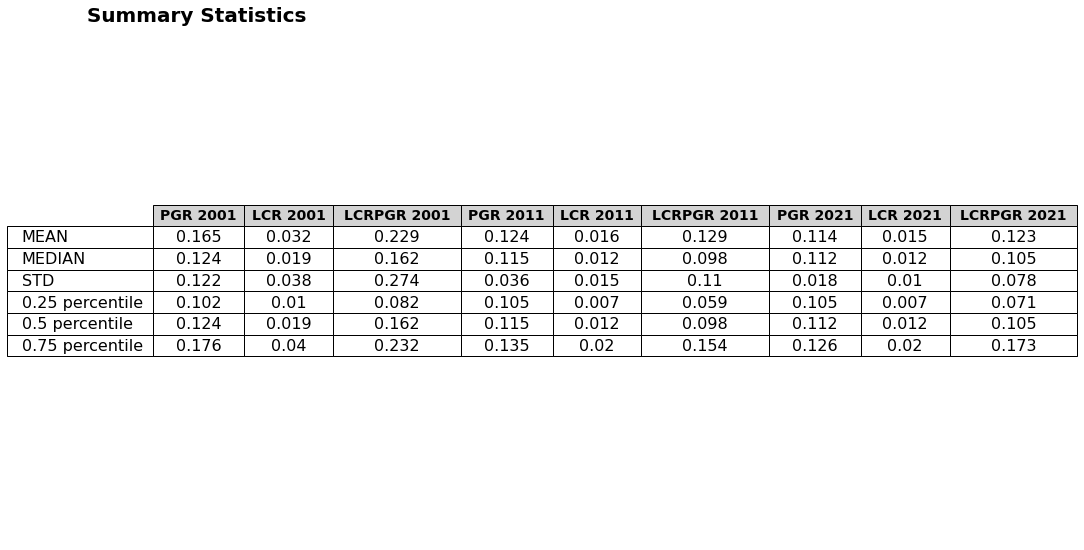

In [43]:
# 1) Reduce the decimal numbers to only 3:
summary_stats_rounded = summary_stats.round(3)

# 2) Change the title of each column to respectively the rate and year (example PGR_2001 = "PGR 2001");
summary_stats_rounded.columns = [col.replace('_', ' ') for col in summary_stats_rounded.columns]

# Modify the row labels
summary_stats_rounded.index = [index.upper() if index in ['mean', 'median', 'std'] else f'{index} percentile' for index in summary_stats_rounded.index]

fig, ax = plt.subplots(1, 1, figsize=(12, 8))  # Adjust the figure size here

ax.axis('tight')
ax.axis('off')

# Create the table
table = ax.table(cellText=summary_stats_rounded.values,
                 colLabels=summary_stats_rounded.columns,
                 rowLabels=summary_stats_rounded.index,
                 cellLoc='center', 
                 loc='center')

# 3) Increase the font size:
table.auto_set_font_size(False)
table.set_fontsize(16)

# 4) Add a background color to the header (light gray):
table.auto_set_column_width(col=list(range(len(summary_stats_rounded.columns))))
table_props = table.properties()
table_cells = table_props['children']
for cell in table_cells:
    if cell.get_text().get_text() in summary_stats_rounded.columns:
        cell.set_fontsize(14)  # Adjust fontsize for column headers here
        cell.get_text().set_weight('bold')  # 5) put the names of the columns in bold.
        cell.set_facecolor('lightgray')  # Set background color for header cells

table.scale(1, 1.5)  # Adjust the scale of the table here
fig.suptitle('Summary Statistics', x=0.1, y=0.95, fontsize=20, weight='bold')

fig.tight_layout()

plt.savefig("data/summary_stats_improved.jpg", bbox_inches='tight')  # Ensure all the contents are included in the saved image
plt.show()

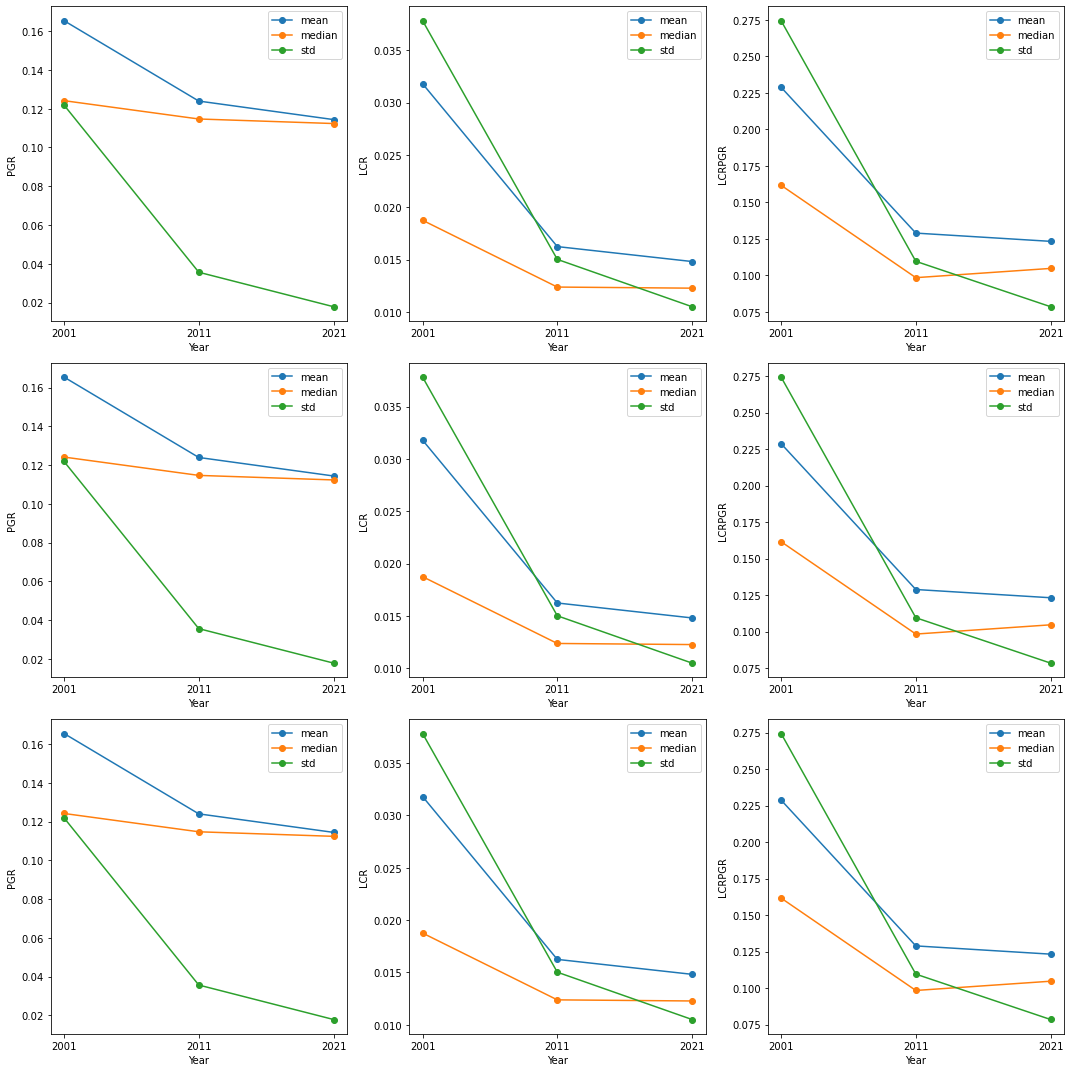

In [44]:
# Identify the maximum value across 'PGR' and 'LCR'
# max_val = max(summary_stats[[col for col in summary_stats.columns if 'PGR' in col or 'LCR' in col]].max())

fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))

# 'mean', 'median', 'std', 0.25, 0.5, 0.75
metrics = ['mean', 'median', 'std'] #, 0.25, 0.5, 0.75
variables = ['PGR', 'LCR', 'LCRPGR']
years = [2001, 2011, 2021]

for i, ax in enumerate(axes.flat):
    for metric in metrics:
        y_values = [summary_stats.loc[metric, f'{variables[i%3]}_{year}'] for year in years]
        ax.plot(years, y_values, marker='o', label=metric)
    ax.set_xlabel('Year')
    ax.set_ylabel(variables[i%3])
    ax.set_xticks(years)  # only show specific year labels on the x-axis
    ax.legend()
    
plt.tight_layout()
plt.show()

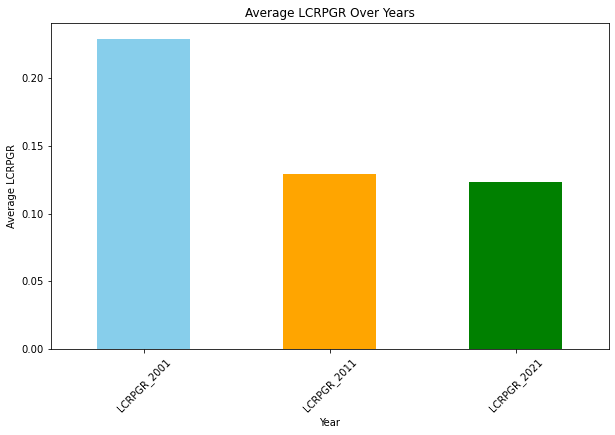

In [45]:
# Visualizing general results for LCRPGR
df_mean = LCRPGR_data[['LCRPGR_2001', 'LCRPGR_2011', 'LCRPGR_2021']].mean()

# Plot
plt.figure(figsize=(10,6))
df_mean.plot(kind='bar', color=['skyblue', 'orange', 'green'])
plt.title('Average LCRPGR Over Years')
plt.xlabel('Year')
plt.ylabel('Average LCRPGR')
plt.xticks(rotation=45)
plt.savefig('data/Average_LCRPGR_Over_Years.png')
plt.show()

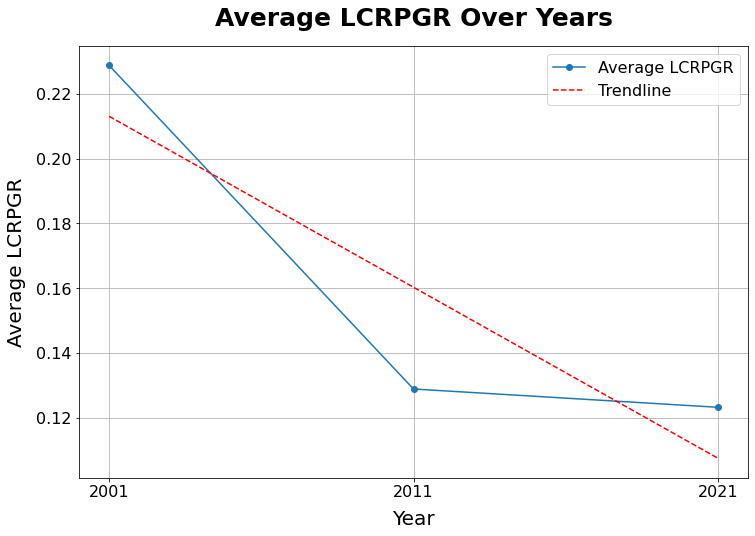

In [49]:
# Turn the series into a DataFrame
df_mean = df_mean.reset_index()

# Rename the columns
df_mean.columns = ['Year', 'Average LCRPGR']

# Make sure 'Year' is an integer (remove this if 'Year' is already an integer)
df_mean['Year'] = df_mean['Year'].str.extract('(\d+)').astype(int)

# Now you should be able to plot
plt.figure(figsize=(12,8))

plt.plot(df_mean['Year'], df_mean['Average LCRPGR'], marker='o', linestyle='-', label='Average LCRPGR')

z = np.polyfit(df_mean['Year'], df_mean['Average LCRPGR'], 1)
p = np.poly1d(z)
plt.plot(df_mean['Year'], p(df_mean['Year']), "r--", label='Trendline')

plt.title('Average LCRPGR Over Years', fontsize=25, weight='bold', pad=20)
plt.xlabel('Year', fontsize=20, labelpad=10)
plt.ylabel('Average LCRPGR', fontsize=20, labelpad=10)

plt.xticks(df_mean['Year'], fontsize=16)
plt.yticks(fontsize=16)

plt.legend(fontsize=16)
plt.grid(True)

plt.subplots_adjust(top=0.9, bottom=0.15)

plt.savefig('data/Average_LCRPGR_Over_Years2.jpg')

plt.show()

## Creating Maps and Charts

<AxesSubplot:>

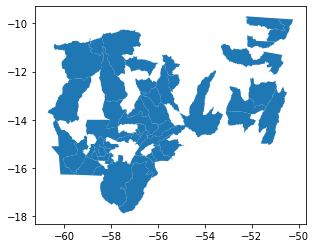

In [50]:
#Region of Interest Shapefile

ROI_SHAPE = "data/SIDRA_MUN_SDG_0.shp"
ROI_SHAPE_amazon = "data/amazon.shp"
ROI_SHAPE_cerrado = "data/cerrado.shp"

# Visualizando se o dado foi dissolvido em um só polígono
amazon_gdf = gpd.read_file(ROI_SHAPE_amazon)
cerrado_gdf = gpd.read_file(ROI_SHAPE_cerrado)

#Visualizing the shapefile
roi_gdf = gpd.read_file(ROI_SHAPE)
roi_gdf.plot()

In [74]:
# Convert the 'CD_GEOCO_1' column in both DataFrames to string (or to int64, based on your data)
roi_gdf['CD_GEOCO_1'] = roi_gdf['CD_GEOCO_1'].astype(str)
LCRPGR_data['CD_GEOCO_1'] = LCRPGR_data['CD_GEOCO_1'].astype(str)

# Merging shapefile and LCRPGR data
merged = roi_gdf.merge(LCRPGR_data, on='CD_GEOCO_1')

# Save the data as a shapefile
merged.to_file("data/LCRPGR.shp")

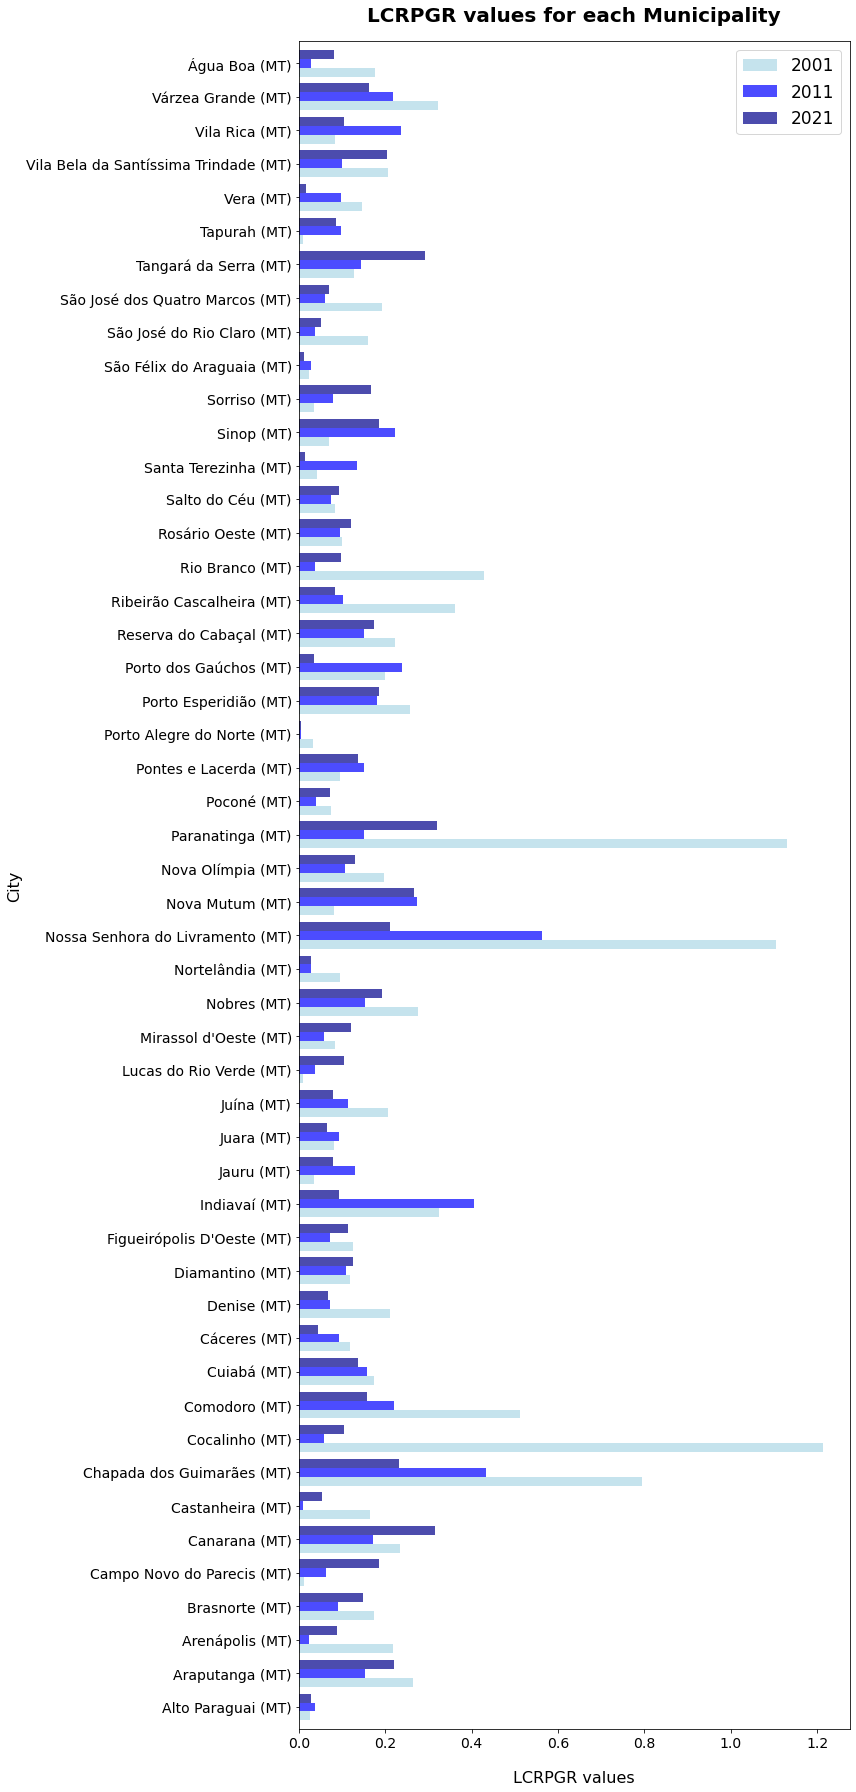

In [81]:
# Set 'City' as the index of the DataFrame
LCRPGR_data.set_index('City', inplace=True)

# Define the colors
colors = ['lightblue', 'blue', 'darkblue']

fig, ax = plt.subplots(figsize=(12, 0.5*len(LCRPGR_data)))

# Create the barh plot with custom colors
LCRPGR_data[['LCRPGR_2001', 'LCRPGR_2011', 'LCRPGR_2021']].plot(kind='barh', color=colors, alpha=0.7, ax=ax, width=0.8)

# Set the title and labels, increase font sizes
ax.set_xlabel('LCRPGR values', fontsize=16, labelpad=20) # Adjust space for x-axis label
ax.set_ylabel('City', fontsize=16)
ax.set_title('LCRPGR values for each Municipality', fontsize=20, weight='bold', pad=20) # Adjust space for title

# Increase the font size on the ticks on the x and y axis
plt.xticks(fontsize=14)
plt.yticks(fontsize=14, rotation=0)

# Create the legend and increase its size, setting the labels manually
ax.legend(['2001', '2011', '2021'], fontsize=17)

# Adjust plot layout
plt.subplots_adjust(top=0.93, bottom=0.1) # Adjust spaces

plt.tight_layout()
plt.savefig('data/LCRPGR_cities.pdf')
plt.show()

Municipalities with highest LCRPGR_2001 values: ['Cocalinho (MT)', 'Nossa Senhora do Livramento (MT)', 'Paranatinga (MT)']
Municipalities with lowest LCRPGR_2001 values: ['Campo Novo do Parecis (MT)', 'Lucas do Rio Verde (MT)', 'Tapurah (MT)']


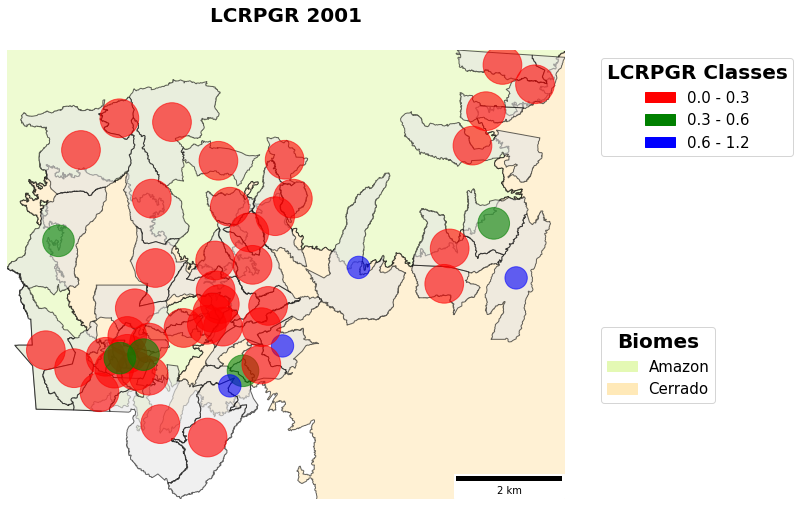

In [75]:
# Set the index of df_pop to 'municipality'
LCRPGR_data.reset_index(level=0, inplace=True)

# Classify the LCRPGR_2001 values into 3 classes
bins = pd.cut(merged['LCRPGR_2001'], bins=[0, 0.3, 0.6, np.inf], right=False)

# Map the categories to circle sizes and colors
class_mapping_size = {str(interval): size for interval, size in zip(bins.cat.categories, [1500, 1000, 500])}
class_mapping_color = {str(interval): color for interval, color in zip(bins.cat.categories, ["red", "green", "blue"])}

sizes = bins.astype(str).map(class_mapping_size)
colors = bins.astype(str).map(class_mapping_color)

fig, ax = plt.subplots(1, figsize=(10, 10))

# Define colors for biomes
biome_colors = {'amazonia': '#E4F9B4', 'cerrado': '#FFE9B8'}

# Convert the GeoDataFrame to the UTM CRS
merged = merged.to_crs(epsg=4326)  # EPSG code 32723 is for UTM zone 23S, adjust as per your data location

# Calculate the bounding box of merged_gdf
bounds = merged.total_bounds
   
# Plot Amazon biome
amazon_gdf.plot(ax=ax, color=biome_colors['amazonia'], alpha=0.6, edgecolor='black', linewidth=1)
    
# Plot Cerrado biome
cerrado_gdf.plot(ax=ax, color=biome_colors['cerrado'], alpha=0.6, edgecolor='black', linewidth=1)
    
# Plot the map
merged.plot(ax=ax, facecolor='0.9', edgecolor='black', alpha=0.6)

# Plot the scatter points
ax.scatter(merged.geometry.centroid.x, merged.geometry.centroid.y, s=sizes, color=colors, alpha=0.6)

# Create legend elements for LCRPGR_2001
legend_elements_LCRPGR = [
    mpatches.Patch(color=class_mapping_color[key], 
                   label='{:.1f} - {:.1f}'.format(
                       float(key.split(',')[0][1:]),
                       float(key.split(',')[1][:-1]) if 'inf' not in key.split(',')[1] else float(merged['LCRPGR_2001'].max())
                   )) 
    for key in class_mapping_color
]

# Define a dictionary to map the biome names to the desired display names
biome_display_names = {'amazonia': 'Amazon', 'cerrado': 'Cerrado'}

# Append legend elements for biomes
legend_elements_biomes = [
    mpatches.Patch(color=color, label=biome_display_names[biome]) for biome, color in biome_colors.items()
]

# Create the legends with larger font size
leg_LCRPGR = ax.legend(handles=legend_elements_LCRPGR, bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 15}, title='LCRPGR Classes')
leg_biomes = ax.legend(handles=legend_elements_biomes, bbox_to_anchor=(1.05, 0.4), loc='upper left', prop={'size': 15}, title='Biomes')

# Change legend title font size and weight
leg_LCRPGR.get_title().set_fontsize('20')
leg_LCRPGR.get_title().set_weight('bold')
leg_biomes.get_title().set_fontsize('20')
leg_biomes.get_title().set_weight('bold')

ax.add_artist(leg_LCRPGR)

# Modify the font size, make the title bold and adjust its position
plt.title('LCRPGR 2001', fontsize=20, fontweight='bold', y=1.05)

ax.axis('off')
    
# Zoom to the bounding box of merged_gdf
ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])

# Add a scale bar
scalebar = ScaleBar(dx=1000, location='lower right') # dx is 1000 because the units are now in meters (1 km = 1000 m)
ax.add_artist(scalebar)

# Get the municipalities with the highest and lowest LCRPGR_2001 values
highest = LCRPGR_data.nlargest(3, 'LCRPGR_2001')['CD_GEOCO_1'].tolist()
lowest = LCRPGR_data.nsmallest(3, 'LCRPGR_2001')['CD_GEOCO_1'].tolist()

highest_cities = LCRPGR_data[LCRPGR_data['CD_GEOCO_1'].isin(highest)]['City'].tolist()
lowest_cities = LCRPGR_data[LCRPGR_data['CD_GEOCO_1'].isin(lowest)]['City'].tolist()

# Print the cities
print('Municipalities with highest LCRPGR_2001 values:', highest_cities)
print('Municipalities with lowest LCRPGR_2001 values:', lowest_cities)

plt.savefig("data/2001.png", dpi=300, bbox_inches='tight')
plt.show()

Municipalities with highest LCRPGR_2011 values: ['Chapada dos Guimarães (MT)', 'Indiavaí (MT)', 'Nossa Senhora do Livramento (MT)']
Municipalities with lowest LCRPGR_2011 values: ['Arenápolis (MT)', 'Castanheira (MT)', 'Porto Alegre do Norte (MT)']


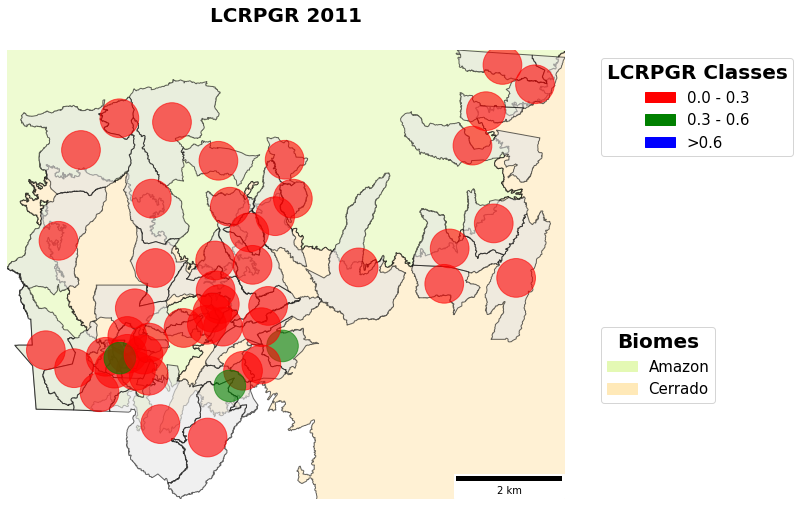

In [77]:
# Classify the LCRPGR_2001 values into 3 classes
bins = pd.cut(merged['LCRPGR_2011'], bins=[0, 0.3, 0.6, np.inf], right=False)

# Map the categories to circle sizes and colors
class_mapping_size = {str(interval): size for interval, size in zip(bins.cat.categories, [1500, 1000, 500])}
class_mapping_color = {str(interval): color for interval, color in zip(bins.cat.categories, ["red", "green", "blue"])}

sizes = bins.astype(str).map(class_mapping_size)
colors = bins.astype(str).map(class_mapping_color)

fig, ax = plt.subplots(1, figsize=(10, 10))

# Define colors for biomes
biome_colors = {'amazonia': '#E4F9B4', 'cerrado': '#FFE9B8'}

# Calculate the bounding box of merged_gdf
bounds = merged.total_bounds
   
# Plot Amazon biome
amazon_gdf.plot(ax=ax, color=biome_colors['amazonia'], alpha=0.6, edgecolor='black', linewidth=1)
    
# Plot Cerrado biome
cerrado_gdf.plot(ax=ax, color=biome_colors['cerrado'], alpha=0.6, edgecolor='black', linewidth=1)
    
# Plot the map
merged.plot(ax=ax, facecolor='0.9', edgecolor='black', alpha=0.6)

# Plot the scatter points
ax.scatter(merged.geometry.centroid.x, merged.geometry.centroid.y, s=sizes, color=colors, alpha=0.6)

# Create legend elements for LCRPGR_2011
legend_elements_LCRPGR = [
    mpatches.Patch(
        color=class_mapping_color[key], 
        label='>0.6' if 'inf' in key.split(',')[1] else '{:.1f} - {:.1f}'.format(
            float(key.split(',')[0][1:]), 
            float(key.split(',')[1][:-1])
        )
    )
    for key in class_mapping_color
]

# Define a dictionary to map the biome names to the desired display names
biome_display_names = {'amazonia': 'Amazon', 'cerrado': 'Cerrado'}

# Append legend elements for biomes
legend_elements_biomes = [
    mpatches.Patch(color=color, label=biome_display_names[biome]) for biome, color in biome_colors.items()
]

# Create the legends with larger font size
leg_LCRPGR = ax.legend(handles=legend_elements_LCRPGR, bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 15}, title='LCRPGR Classes')
leg_biomes = ax.legend(handles=legend_elements_biomes, bbox_to_anchor=(1.05, 0.4), loc='upper left', prop={'size': 15}, title='Biomes')

# Change legend title font size and weight
leg_LCRPGR.get_title().set_fontsize('20')
leg_LCRPGR.get_title().set_weight('bold')
leg_biomes.get_title().set_fontsize('20')
leg_biomes.get_title().set_weight('bold')

ax.add_artist(leg_LCRPGR)

# Modify the font size, make the title bold and adjust its position
plt.title('LCRPGR 2011', fontsize=20, fontweight='bold', y=1.05)

ax.axis('off')
    
# Zoom to the bounding box of merged_gdf
ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])

# Add a scale bar
scalebar = ScaleBar(dx=1000, location='lower right') # dx is 1000 because the units are now in meters (1 km = 1000 m)
ax.add_artist(scalebar)

# Get the municipalities with the highest and lowest LCRPGR_2001 values
highest = LCRPGR_data.nlargest(3, 'LCRPGR_2011')['CD_GEOCO_1'].tolist()
lowest = LCRPGR_data.nsmallest(3, 'LCRPGR_2011')['CD_GEOCO_1'].tolist()

highest_cities = LCRPGR_data[LCRPGR_data['CD_GEOCO_1'].isin(highest)]['City'].tolist()
lowest_cities = LCRPGR_data[LCRPGR_data['CD_GEOCO_1'].isin(lowest)]['City'].tolist()

# Print the cities
print('Municipalities with highest LCRPGR_2011 values:', highest_cities)
print('Municipalities with lowest LCRPGR_2011 values:', lowest_cities)

plt.savefig("data/2011.png", dpi=300, bbox_inches='tight')
plt.show()

Municipalities with highest LCRPGR_2021 values: ['Canarana (MT)', 'Paranatinga (MT)', 'Tangará da Serra (MT)']
Municipalities with lowest LCRPGR_2021 values: ['Porto Alegre do Norte (MT)', 'Santa Terezinha (MT)', 'São Félix do Araguaia (MT)']


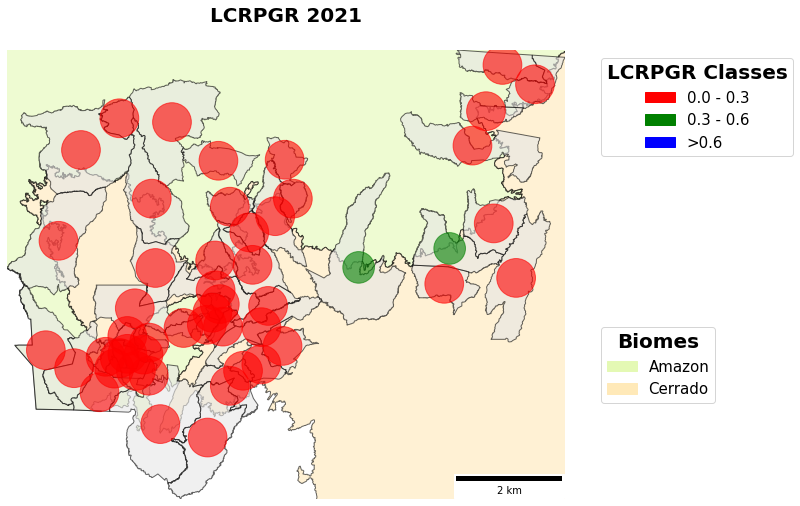

In [78]:
# Classify the LCRPGR_2001 values into 3 classes
bins = pd.cut(merged['LCRPGR_2021'], bins=[0, 0.3, 0.6, np.inf], right=False)

# Map the categories to circle sizes and colors
class_mapping_size = {str(interval): size for interval, size in zip(bins.cat.categories, [1500, 1000, 500])}
class_mapping_color = {str(interval): color for interval, color in zip(bins.cat.categories, ["red", "green", "blue"])}

sizes = bins.astype(str).map(class_mapping_size)
colors = bins.astype(str).map(class_mapping_color)

fig, ax = plt.subplots(1, figsize=(10, 10))

# Define colors for biomes
biome_colors = {'amazonia': '#E4F9B4', 'cerrado': '#FFE9B8'}

# Calculate the bounding box of merged_gdf
bounds = merged.total_bounds
   
# Plot Amazon biome
amazon_gdf.plot(ax=ax, color=biome_colors['amazonia'], alpha=0.6, edgecolor='black', linewidth=1)
    
# Plot Cerrado biome
cerrado_gdf.plot(ax=ax, color=biome_colors['cerrado'], alpha=0.6, edgecolor='black', linewidth=1)
    
# Plot the map
merged.plot(ax=ax, facecolor='0.9', edgecolor='black', alpha=0.6)

# Plot the scatter points
ax.scatter(merged.geometry.centroid.x, merged.geometry.centroid.y, s=sizes, color=colors, alpha=0.6)

# Create legend elements for LCRPGR_2021
legend_elements_LCRPGR = [
    mpatches.Patch(
        color=class_mapping_color[key], 
        label='>0.6' if 'inf' in key.split(',')[1] else '{:.1f} - {:.1f}'.format(
            float(key.split(',')[0][1:]), 
            float(key.split(',')[1][:-1])
        )
    )
    for key in class_mapping_color
]

# Define a dictionary to map the biome names to the desired display names
biome_display_names = {'amazonia': 'Amazon', 'cerrado': 'Cerrado'}

# Append legend elements for biomes
legend_elements_biomes = [
    mpatches.Patch(color=color, label=biome_display_names[biome]) for biome, color in biome_colors.items()
]

# Create the legends with larger font size
leg_LCRPGR = ax.legend(handles=legend_elements_LCRPGR, bbox_to_anchor=(1.05, 1), loc='upper left', prop={'size': 15}, title='LCRPGR Classes')
leg_biomes = ax.legend(handles=legend_elements_biomes, bbox_to_anchor=(1.05, 0.4), loc='upper left', prop={'size': 15}, title='Biomes')

# Change legend title font size and weight
leg_LCRPGR.get_title().set_fontsize('20')
leg_LCRPGR.get_title().set_weight('bold')
leg_biomes.get_title().set_fontsize('20')
leg_biomes.get_title().set_weight('bold')

ax.add_artist(leg_LCRPGR)

# Modify the font size, make the title bold and adjust its position
plt.title('LCRPGR 2021', fontsize=20, fontweight='bold', y=1.05)

ax.axis('off')
    
# Zoom to the bounding box of merged_gdf
ax.set_xlim(bounds[0], bounds[2])
ax.set_ylim(bounds[1], bounds[3])

# Add a scale bar
scalebar = ScaleBar(dx=1000, location='lower right') # dx is 1000 because the units are now in meters (1 km = 1000 m)
ax.add_artist(scalebar)

# Get the municipalities with the highest and lowest LCRPGR_2001 values
highest = LCRPGR_data.nlargest(3, 'LCRPGR_2021')['CD_GEOCO_1'].tolist()
lowest = LCRPGR_data.nsmallest(3, 'LCRPGR_2021')['CD_GEOCO_1'].tolist()

highest_cities = LCRPGR_data[LCRPGR_data['CD_GEOCO_1'].isin(highest)]['City'].tolist()
lowest_cities = LCRPGR_data[LCRPGR_data['CD_GEOCO_1'].isin(lowest)]['City'].tolist()

# Print the cities
print('Municipalities with highest LCRPGR_2021 values:', highest_cities)
print('Municipalities with lowest LCRPGR_2021 values:', lowest_cities)

plt.savefig("data/2021.png", dpi=300, bbox_inches='tight')
plt.show()

## Population Data Analysis and Validation

For the determination of using linear methods in the population data, the Compound Annual Growth Rate (CAGR) was analyzed.

The CAGR method assumes a constant growth rate year over year, which might not be the most accurate representation of the data. In reality, population growth and land consumption may not occur at a consistent rate due to numerous influencing factors such as migration, policy changes, economic conditions, and natural disasters, among others. These variations can cause the actual year-on-year growth rates to diverge from the constant rate assumed by the CAGR.

By using a linear approach, here we are effectively computing the average rate of change over the entire period of interest. This method takes into account the total change over time and divides it by the number of periods, without making any assumptions about compounding growth. It provides a more straightforward and intuitive understanding of the overall trend, without the complexity of compounded growth calculations.

While the CAGR could provide a smoothed, idealized rate of growth, it could potentially mask some of the year-on-year fluctuations that are crucial for a comprehensive understanding of the data. The linear method, on the other hand, is a way to capture the raw, overall rate of change without the assumption of a uniform rate of growth. It can better reflect the reality of the data, where growth rates can change from year to year.

Moreover, if we are directly comparing or combining LCR and PGR, it's crucial to use consistent methods for both. The linear method for both ensures that we are properly comparing the two metrics on equal grounds. It doesn't make one appear artificially larger or smaller due to the differences in calculation methods.

The values found in CAGR_1991_to_2000 and CAGR_2000_to_2010 provide the Compound Annual Growth Rate (CAGR) of population for each city for two distinct decades. These values allow you to understand and compare the annualized, average growth rate of population over these periods.

Here are some potential conclusions that could be drawn:

*Trend Analysis*: If the CAGR of a city increased from the 1991-2000 decade to the 2000-2010 decade, this indicates that the population growth rate accelerated in the latter decade. Conversely, if the CAGR decreased, the population growth rate slowed down.

*City Comparison*: Comparing CAGRs among cities can help identify which cities experienced the fastest or slowest population growth in each decade.

*Growth Stability*: If a city's CAGR is similar between the two periods, this may suggest a relatively steady, stable growth rate. Wide variations could imply more volatile growth dynamics, perhaps due to certain events or conditions specific to those periods.

*Negative Growth*: Negative CAGR indicates a decrease in population over time, which might be due to various factors like economic downturns, migration, etc.

In [55]:
# Calculate the compound annual growth rate for each city
def calculate_cagr(start_value, end_value, periods):
    return (end_value / start_value) ** (1 / periods) - 1

# Create a pivot table with years as columns and cities as rows
pivot_df = selected_years_df.pivot(index='City', columns='Year', values='Value')

# Calculate the CAGR for 1991-2000 and 2000-2010
pivot_df['CAGR_1991_to_2000'] = calculate_cagr(pivot_df[1991], pivot_df[2000], 2000 - 1991)
pivot_df['CAGR_2000_to_2010'] = calculate_cagr(pivot_df[2000], pivot_df[2010], 2010 - 2000)

# Display the pivot table
display(pivot_df)

Year,1991,2000,2010,CAGR_1991_to_2000,CAGR_2000_to_2010
City,,,,,
Alto Paraguai (MT),9846,6522,6383,-0.044733,-0.002152
Araputanga (MT),7276,10810,12185,0.044970,0.012045
Arenápolis (MT),16160,10763,9750,-0.044154,-0.009836
Brasnorte (MT),3710,6310,10038,0.060787,0.047519
Campo Novo do Parecis (MT),2211,14713,25584,0.234403,0.056883
Canarana (MT),6655,11657,14805,0.064262,0.024194
Castanheira (MT),3629,3680,3921,0.001552,0.006364
Chapada dos Guimarães (MT),5249,8840,11037,0.059627,0.022445
Cocalinho (MT),2423,3413,3647,0.038799,0.006653


### Histograms

For the CAGR histograms:

- If the histograms are normally distributed (bell-shaped), this means that most of the cities had growth rates that are around the average, with fewer cities having very high or very low growth rates.

- If the histograms are skewed to the right, this suggests that more cities had lower growth rates, with fewer cities experiencing high growth rates.

- If the histograms are skewed to the left, this indicates that more cities had higher growth rates, with fewer cities having low growth rates.

- If the histograms for the two time periods (1991-2000 and 2000-2010) are similar in shape, this could suggest that the overall distribution of growth rates did not change much over time.

- If the histograms are different, this could indicate a shift in growth rates over time. For example, if the 2000-2010 histogram is more skewed to the right than the 1991-2000 histogram, this could suggest that more cities had lower growth rates in 2000-2010 compared to 1991-2000.

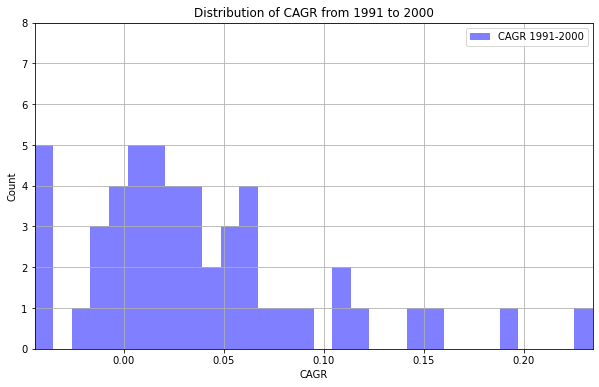

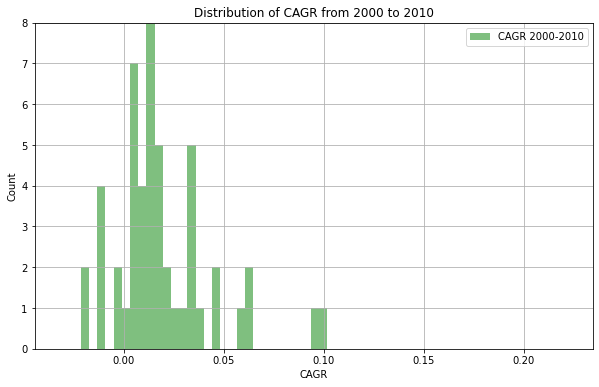

In [56]:
# Get the common range for x-axis
x_min = min(pivot_df[['CAGR_1991_to_2000', 'CAGR_2000_to_2010']].min())
x_max = max(pivot_df[['CAGR_1991_to_2000', 'CAGR_2000_to_2010']].max())

# Get histogram values to get common range for y-axis
counts1, bins1 = np.histogram(pivot_df['CAGR_1991_to_2000'], bins=30)
counts2, bins2 = np.histogram(pivot_df['CAGR_2000_to_2010'], bins=30)

# Find maximum count value to set the same y-axis limit for both plots
y_max = max(max(counts1), max(counts2))

# Plotting CAGR_1991_to_2000
plt.figure(figsize=(10,6))
plt.hist(pivot_df['CAGR_1991_to_2000'], bins=30, alpha=0.5, color='blue', label='CAGR 1991-2000')
plt.title('Distribution of CAGR from 1991 to 2000')
plt.xlabel('CAGR')
plt.ylabel('Count')
plt.xlim(x_min, x_max)
plt.ylim(0, y_max)
plt.legend()
plt.grid(True)
plt.savefig('data/CAGR_1991_to_2000.png')
plt.show()

# Plotting CAGR_2000_to_2010
plt.figure(figsize=(10,6))
plt.hist(pivot_df['CAGR_2000_to_2010'], bins=30, alpha=0.5, color='green', label='CAGR 2000-2010')
plt.title('Distribution of CAGR from 2000 to 2010')
plt.xlabel('CAGR')
plt.ylabel('Count')
plt.xlim(x_min, x_max)
plt.ylim(0, y_max)
plt.legend()
plt.grid(True)
plt.savefig('data/CAGR_2000_to_2010.png')
plt.show()

### Scatter-plots

Scatter plot of CAGR_1991_to_2000 on the x-axis and CAGR_2000_to_2010 on the y-axis.Also plotted a diagonal line (from the minimum to the maximum of both axes) which will help visually compare the two periods. If the CAGR was the same in both periods, the points should lie along this line. If they're above the line, it means the CAGR in 2000-2010 was higher, and if they're below the line, it means the CAGR in 1991-2000 was higher.

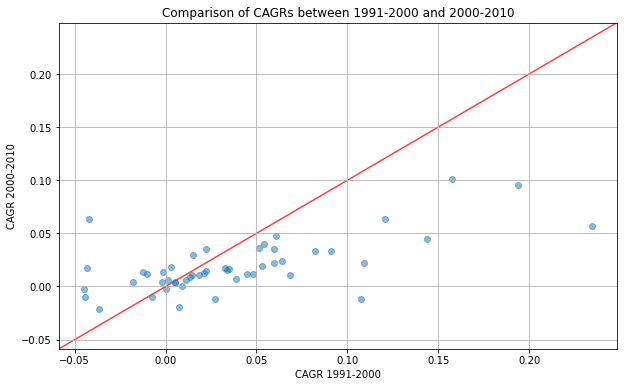

In [57]:
plt.figure(figsize=(10,6))
plt.scatter(pivot_df['CAGR_1991_to_2000'], pivot_df['CAGR_2000_to_2010'], alpha=0.5)
plt.title('Comparison of CAGRs between 1991-2000 and 2000-2010')
plt.xlabel('CAGR 1991-2000')
plt.ylabel('CAGR 2000-2010')
plt.grid(True)

# plot the diagonal line
limits = [
    np.min([plt.xlim(), plt.ylim()]),  # min of both axes
    np.max([plt.xlim(), plt.ylim()]),  # max of both axes
]

plt.plot(limits, limits, color='red', alpha=0.75, zorder=0)
plt.xlim(limits)
plt.ylim(limits)

plt.savefig('data/Comparison_CAGRs.png')
plt.show()

### Validating Population Estimation (Linear Method)

- In this analysis, we aimed to validate the accuracy of a linear estimation method used to project population counts. This method was previously applied to estimate the populations for the years 2001, 2011, and 2021. To assess the accuracy of this method, we decided to estimate the population for the year 2020 — a year for which we have actual census data, officially measured by the Brazilian Institute of Geography and Statistics (IBGE).

- We used the official total population data from the years 2000 and 2010 as our baseline. By comparing the estimated populations for 2020 generated by the linear method to the official 2020 population data, we could calculate the error rate and thus evaluate the accuracy of the linear population estimation method.

### Assumptions and Limitations of the Linear Method

- The linear estimation method we used assumes that the population growth rate within each municipality remains constant over time. In other words, it presumes that the number of people added to the population every year (or subtracted from it, in the case of negative growth) stays the same.

- This assumption is based on the logic that a municipality's population growth is influenced by a mix of factors (such as birth rates, death rates, and migration rates) that are relatively stable over short periods of time.

This method has some limitations:

- Changes in Growth Rate: Over longer periods of time, or due to significant events (e.g., economic changes, natural disasters, policy changes), the population growth rate can change significantly. The linear method cannot account for these changes.

- Non-linear Trends: The actual population growth trend might not be linear. For instance, it could be exponential if the birth rate is much higher than the death rate.

- Local Variations: The growth rate might vary significantly between different municipalities based on local conditions and policies.

In conclusion, while the linear method can provide a good first approximation of population trends and is simple to use, it's important to remember its assumptions and limitations when interpreting the results.

In [58]:
# Select population data for municipalities in the years 1991, 2000, 2010
# SIDRA - see https://servicodados.ibge.gov.br/api/docs/agregados?versao=3#api-bq
# We want to reach this result - https://sidra.ibge.gov.br/tabela/200
# Access SIDRA https://sidra.ibge.gov.br/home/ipca15/brasil
# How to set parameters for extracting and formatting data from a Sidra table: https://apisidra.ibge.gov.br/

dfs = []  # Initialize an empty list to store dataframes

for code in property_list:
    df = sidrapy.get_table(table_code='200',
                           territorial_level='6',
                           ibge_territorial_code=code,
                           classifications= {"1": "0", "2":"0"}, # urban parameters
                           period= 'last 20')
    dfs.append(df)  # Append the dataframe to the list

# Combine all dataframes into one
final_df = pd.concat(dfs)
final_df.head()

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N,D5C,D5N,D6C,D6N
0,Nível Territorial (Código),Nível Territorial,Unidade de Medida (Código),Unidade de Medida,Valor,Município (Código),Município,Ano (Código),Ano,Situação do domicílio (Código),Situação do domicílio,Sexo (Código),Sexo,Variável (Código),Variável,Grupo de idade (Código),Grupo de idade
1,6,Município,45,Pessoas,9576,5105507,Vila Bela da Santíssima Trindade (MT),1970,1970,0,Total,0,Total,93,População residente,0,Total
2,6,Município,45,Pessoas,8935,5105507,Vila Bela da Santíssima Trindade (MT),1980,1980,0,Total,0,Total,93,População residente,0,Total
3,6,Município,45,Pessoas,13693,5105507,Vila Bela da Santíssima Trindade (MT),1991,1991,0,Total,0,Total,93,População residente,0,Total
4,6,Município,45,Pessoas,12665,5105507,Vila Bela da Santíssima Trindade (MT),2000,2000,0,Total,0,Total,93,População residente,0,Total


In [59]:
# Selecting years: 1991, 2000 and 2010
checking = final_df[final_df['D2N'].isin(['2000', '2010'])]
checking

,NC,NN,MC,MN,V,D1C,D1N,D2C,D2N,D3C,D3N,D4C,D4N,D5C,D5N,D6C,D6N
4,6,Município,45,Pessoas,12665,5105507,Vila Bela da Santíssima Trindade (MT),2000,2000,0,Total,0,Total,93,População residente,0,Total
5,6,Município,45,Pessoas,14493,5105507,Vila Bela da Santíssima Trindade (MT),2010,2010,0,Total,0,Total,93,População residente,0,Total
4,6,Município,45,Pessoas,7246,5106000,Nortelândia (MT),2000,2000,0,Total,0,Total,93,População residente,0,Total
5,6,Município,45,Pessoas,6436,5106000,Nortelândia (MT),2010,2010,0,Total,0,Total,93,População residente,0,Total
4,6,Município,45,Pessoas,15583,5108600,Vila Rica (MT),2000,2000,0,Total,0,Total,93,População residente,0,Total
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5,6,Município,45,Pessoas,10235,5108501,Vera (MT),2010,2010,0,Total,0,Total,93,População residente,0,Total
4,6,Município,45,Pessoas,2056,5104500,Indiavaí (MT),2000,2000,0,Total,0,Total,93,População residente,0,Total
5,6,Município,45,Pessoas,2397,5104500,Indiavaí (MT),2010,2010,0,Total,0,Total,93,População residente,0,Total
4,6,Município,45,Pessoas,5092,5107206,Rio Branco (MT),2000,2000,0,Total,0,Total,93,População residente,0,Total


In [60]:
# Renaming Columns:
checking = checking.rename(columns={
    "NC": "Territorial Level (Code)",
    "NN": "Territorial Level",
    "MC": "Unit of Measure (Code)",
    "MN": "Unit of Measure",
    "V": "Value",
    "D1C": "City (Code)",
    "D1N": "City",
    "D2C": "Year (Code)",
    "D2N": "Year",
    "D3C": "Domicile Situation (Code)",
    "D3N": "Domicile Situation",
    "D4C": "Variable (Code)",
    "D4N": "Variable",
    "D5C": "Sex (Code)",
    "D5N": "Sex",
    "D6C": "Age Group (Code)",
    "D6N": "Age Group"
})

# Droping columns:
columns_to_drop = ["Year (Code)", "Sex (Code)", "Sex", "Age Group (Code)", "Age Group", "Domicile Situation (Code)", "Domicile Situation", "Variable (Code)", "Variable"]
checking = checking.drop(columns=columns_to_drop)
checking

,Territorial Level (Code),Territorial Level,Unit of Measure (Code),Unit of Measure,Value,City (Code),City,Year
4,6,Município,45,Pessoas,12665,5105507,Vila Bela da Santíssima Trindade (MT),2000
5,6,Município,45,Pessoas,14493,5105507,Vila Bela da Santíssima Trindade (MT),2010
4,6,Município,45,Pessoas,7246,5106000,Nortelândia (MT),2000
5,6,Município,45,Pessoas,6436,5106000,Nortelândia (MT),2010
4,6,Município,45,Pessoas,15583,5108600,Vila Rica (MT),2000
...,...,...,...,...,...,...,...,...
5,6,Município,45,Pessoas,10235,5108501,Vera (MT),2010
4,6,Município,45,Pessoas,2056,5104500,Indiavaí (MT),2000
5,6,Município,45,Pessoas,2397,5104500,Indiavaí (MT),2010
4,6,Município,45,Pessoas,5092,5107206,Rio Branco (MT),2000


In [61]:
# Checking column types
checking['Year'] = checking['Year'].astype(int)
checking['Value'] = checking['Value'].astype(int)

In [62]:
# Calculating population growth rate and estimating population:
def calculate_population_and_growth(group):
    # Calculate the growth rate for 2000-2010
    group['population_growth_rate_2000_2010'] = (group['Value'].loc[group['Year'] == 2010].values[0] - group['Value'].loc[group['Year'] == 2000].values[0]) / (2010 - 2000)
    
    # Estimate the population for 2020 using the growth rate from 2000-2010
    group['new_population_count_2020'] = group['Value'].loc[group['Year'] == 2010].values[0] + group['population_growth_rate_2000_2010'] * (2020 - 2010)
    return group

# Assuming your dataframe is named as df
# Apply the function
checking = checking.groupby('City').apply(calculate_population_and_growth)

In [63]:
# Visualizing calculations
checking

,Territorial Level (Code),Territorial Level,Unit of Measure (Code),Unit of Measure,Value,City (Code),City,Year,population_growth_rate_2000_2010,new_population_count_2020
4,6,Município,45,Pessoas,8605,5100508,Alto Paraguai (MT),2000,146.1,11527.0
5,6,Município,45,Pessoas,10066,5100508,Alto Paraguai (MT),2010,146.1,11527.0
4,6,Município,45,Pessoas,13675,5101258,Araputanga (MT),2000,166.7,17009.0
5,6,Município,45,Pessoas,15342,5101258,Araputanga (MT),2010,166.7,17009.0
4,6,Município,45,Pessoas,11746,5101308,Arenápolis (MT),2000,-143.0,8886.0
...,...,...,...,...,...,...,...,...,...,...
5,6,Município,45,Pessoas,21382,5108600,Vila Rica (MT),2010,579.9,27181.0
4,6,Município,45,Pessoas,215298,5108402,Várzea Grande (MT),2000,3729.8,289894.0
5,6,Município,45,Pessoas,252596,5108402,Várzea Grande (MT),2010,3729.8,289894.0
4,6,Município,45,Pessoas,16737,5100201,Água Boa (MT),2000,411.9,24975.0


In [64]:
# Ajusting dataframe
# Keep the last 4 characters
checking['City (Code)'] = checking['City (Code)'].str[-4:]

# Ensure 'City (Code)' column is of string type
checking['City (Code)'] = checking['City (Code)'].astype(str)

# Define the municipality code
municipality_code = '7156'  # replace with the code you want

# Select the specific municipality
specific_municipality = checking[checking['City (Code)'] == municipality_code]
specific_municipality

,Territorial Level (Code),Territorial Level,Unit of Measure (Code),Unit of Measure,Value,City (Code),City,Year,population_growth_rate_2000_2010,new_population_count_2020
4,6,Município,45,Pessoas,2418,7156,Reserva do Cabaçal (MT),2000,15.4,2726.0
5,6,Município,45,Pessoas,2572,7156,Reserva do Cabaçal (MT),2010,15.4,2726.0


In [65]:
# COMPARING RESULTS
# Using official data estimation for total population
# Replace 'filepath' with the path of your csv file
filepath = 'data/POP2020_20220905.csv'

# Read the CSV data file
df_ibge = pd.read_csv(filepath, sep = ';')

df_ibge = df_ibge[df_ibge['COD_MUNIC'].notna()]
df_ibge['COD_MUNIC'] = df_ibge['COD_MUNIC'].astype(int)
df_ibge['COD_MUNIC'] = df_ibge['COD_MUNIC'].astype(int)

# Display the first 5 rows of the dataframe
print(df_ibge)

     UF  COD_UF  COD_MUNIC NOME DO MUNICÍPIO   pop 
0    MT      51        102          Acorizal   5334
1    MT      51        201          Água Boa  26204
2    MT      51        250     Alta Floresta  51959
3    MT      51        300     Alto Araguaia  19385
4    MT      51        359    Alto Boa Vista   6936
..   ..     ...        ...               ...    ...
136  MT      51       8600         Vila Rica  26496
137  MT      51       8808      Nova Guarita   4464
138  MT      51       8857   Nova Marilândia   3304
139  MT      51       8907      Nova Maringá   8850
140  MT      51       8956  Nova Monte Verde   9277

[141 rows x 5 columns]


In [66]:
# Ensure 'City (Code)' column is of string type
df_ibge['COD_MUNIC'] = df_ibge['COD_MUNIC'].astype(str)

# Define the municipality code
municipality_code_2 = '1308'  # replace with the code you want

# Select the specific municipality
specific_municipality_2 = df_ibge[df_ibge['COD_MUNIC'] == municipality_code_2]
specific_municipality_2

,UF,COD_UF,COD_MUNIC,NOME DO MUNICÍPIO,pop
12,MT,51,1308,Arenápolis,9502


In [67]:
# Filter df_ibge for rows where 'COD_MUNIC' is in 'City (Code)' and 'UF' equals 'MT'
filtered_df_ibge = df_ibge[(df_ibge['COD_MUNIC'].isin(checking['City (Code)'])) & (df_ibge['UF'] == 'MT')]
filtered_df_ibge

,UF,COD_UF,COD_MUNIC,NOME DO MUNICÍPIO,pop
11,MT,51,1258,Araputanga,16951
12,MT,51,1308,Arenápolis,9502
18,MT,51,1902,Brasnorte,20140
19,MT,51,2504,Cáceres,94861
21,MT,51,2637,Campo Novo do Parecis,36143
25,MT,51,2702,Canarana,21842
27,MT,51,2850,Castanheira,8749
28,MT,51,3007,Chapada dos Guimarães,19453
30,MT,51,3106,Cocalinho,5681
33,MT,51,3304,Comodoro,21008


In [68]:
# Counting municipalities
num_municipalities = filtered_df_ibge['NOME DO MUNICÍPIO'].nunique()
print(f'There are {num_municipalities} municipalities.')

There are 48 municipalities.


In [69]:
# First, ensure that both columns you are merging on are of the same data type
filtered_df_ibge['COD_MUNIC'] = filtered_df_ibge['COD_MUNIC'].astype(str)
checking['City (Code)'] = checking['City (Code)'].astype(str)

# Perform the merge operation
merged_df = pd.merge(filtered_df_ibge, checking, left_on='COD_MUNIC', right_on='City (Code)', how='outer')

# Droping columns:
columns_to_drop = ["COD_UF", "Territorial Level (Code)", "Territorial Level", "Unit of Measure (Code)"]
merged_df = merged_df.drop(columns=columns_to_drop)

# Visualizing dataframe:
print(merged_df)

     UF COD_MUNIC NOME DO MUNICÍPIO     pop  Unit of Measure  Value  \
0    MT      1258        Araputanga  16951.0         Pessoas  13675   
1    MT      1258        Araputanga  16951.0         Pessoas  15342   
2    MT      1308        Arenápolis   9502.0         Pessoas  11746   
3    MT      1308        Arenápolis   9502.0         Pessoas  10316   
4    MT      1902         Brasnorte  20140.0         Pessoas   9815   
..  ...       ...               ...      ...             ...    ...   
95   MT      8600         Vila Rica  26496.0         Pessoas  21382   
96  NaN       NaN               NaN      NaN         Pessoas   8605   
97  NaN       NaN               NaN      NaN         Pessoas  10066   
98  NaN       NaN               NaN      NaN         Pessoas  16737   
99  NaN       NaN               NaN      NaN         Pessoas  20856   

   City (Code)                City  Year  population_growth_rate_2000_2010  \
0         1258     Araputanga (MT)  2000                             

In [70]:
# Correcting space in column:
merged_df.columns = merged_df.columns.str.strip()

# Convert columns to the appropriate types
merged_df['pop'] = pd.to_numeric(merged_df['pop'], errors='coerce')
merged_df['new_population_count_2020'] = pd.to_numeric(merged_df['new_population_count_2020'], errors='coerce')
merged_df['Year'] = pd.to_numeric(merged_df['Year'], errors='coerce')

# Error
merged_df['error'] = ((merged_df['new_population_count_2020'] - merged_df['pop']) / merged_df['pop']) * 100

# Create a mask for rows where Year equals 2010
mask = merged_df['Year'] == 2010

# Select the desired columns for these rows
selected_df = merged_df.loc[mask, ['City', 'pop', 'new_population_count_2020', 'error']]
selected_df

,City,pop,new_population_count_2020,error
1,Araputanga (MT),16951.0,17009.0,0.342163
3,Arenápolis (MT),9502.0,8886.0,-6.482846
5,Brasnorte (MT),20140.0,20899.0,3.768620
7,Cáceres (MT),94861.0,90027.0,-5.095877
9,Campo Novo do Parecis (MT),36143.0,37516.0,3.798799
11,Canarana (MT),21842.0,22100.0,1.181211
13,Castanheira (MT),8749.0,8672.0,-0.880101
15,Chapada dos Guimarães (MT),19453.0,19887.0,2.231018
17,Cocalinho (MT),5681.0,5476.0,-3.608520
19,Comodoro (MT),21008.0,21310.0,1.437548


### Error:

The overall error of approximately -2.04% means that on average, the calculated population counts for 2020 ('new_population_count_2020') are around 2.04% lower than the actual population counts ('pop') across all the cities in your dataset for the year 2010.

In [71]:
# Calculating the overall error by estimating population with the linear method adopted
overall_error = selected_df['error'].mean()
print(f'The overall error is {overall_error}%.')

The overall error is -2.0383858504817507%.


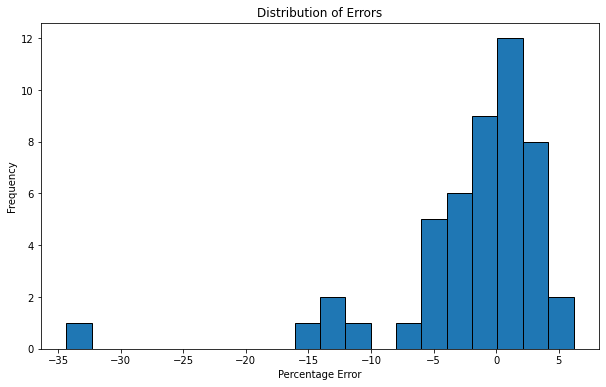

In [72]:
# Plotting the distribution error
plt.figure(figsize=(10, 6))

plt.hist(selected_df['error'], bins=20, edgecolor='black')

plt.title('Distribution of Errors')
plt.xlabel('Percentage Error')
plt.ylabel('Frequency')

plt.savefig('data/error_distribution.png')
plt.show()

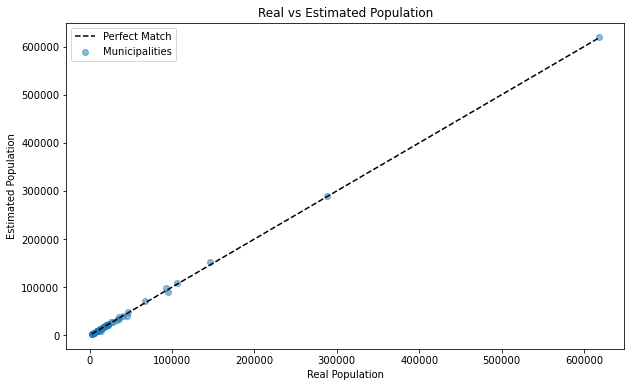

In [73]:
# Plotting estimated and measured population
plt.figure(figsize=(10, 6))

# Add a label to the scatter points
plt.scatter(selected_df['pop'], selected_df['new_population_count_2020'], alpha=0.5, label='Municipalities')

# Add a label to the line
plt.plot([selected_df['pop'].min(), selected_df['pop'].max()], [selected_df['pop'].min(), selected_df['pop'].max()], 'k--', label='Perfect Match')

plt.title('Real vs Estimated Population')
plt.xlabel('Real Population')
plt.ylabel('Estimated Population')

# Display the legend
plt.legend()

plt.savefig('data/real_estimated_population.png')
plt.show()